# PROBLEM STATEMENT

# This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Description of the column

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

# SOLUTION TO BE ACHEIVED

Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file

# IMPORTING ALL THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as ms

import warnings
warnings.filterwarnings('ignore')

# LOADING DATASET

In [2]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Count of the column is same but mean of total volume is more than maximum which is concern.standard daviation of total bag is also little bit higher side.

In [6]:
missing_value = df.isnull().sum()
print(missing_value)
missing_val_per = df.isnull().mean()*100
print(missing_val_per)

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
Unnamed: 0      0.0
Date            0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
year            0.0
region          0.0
dtype: float64


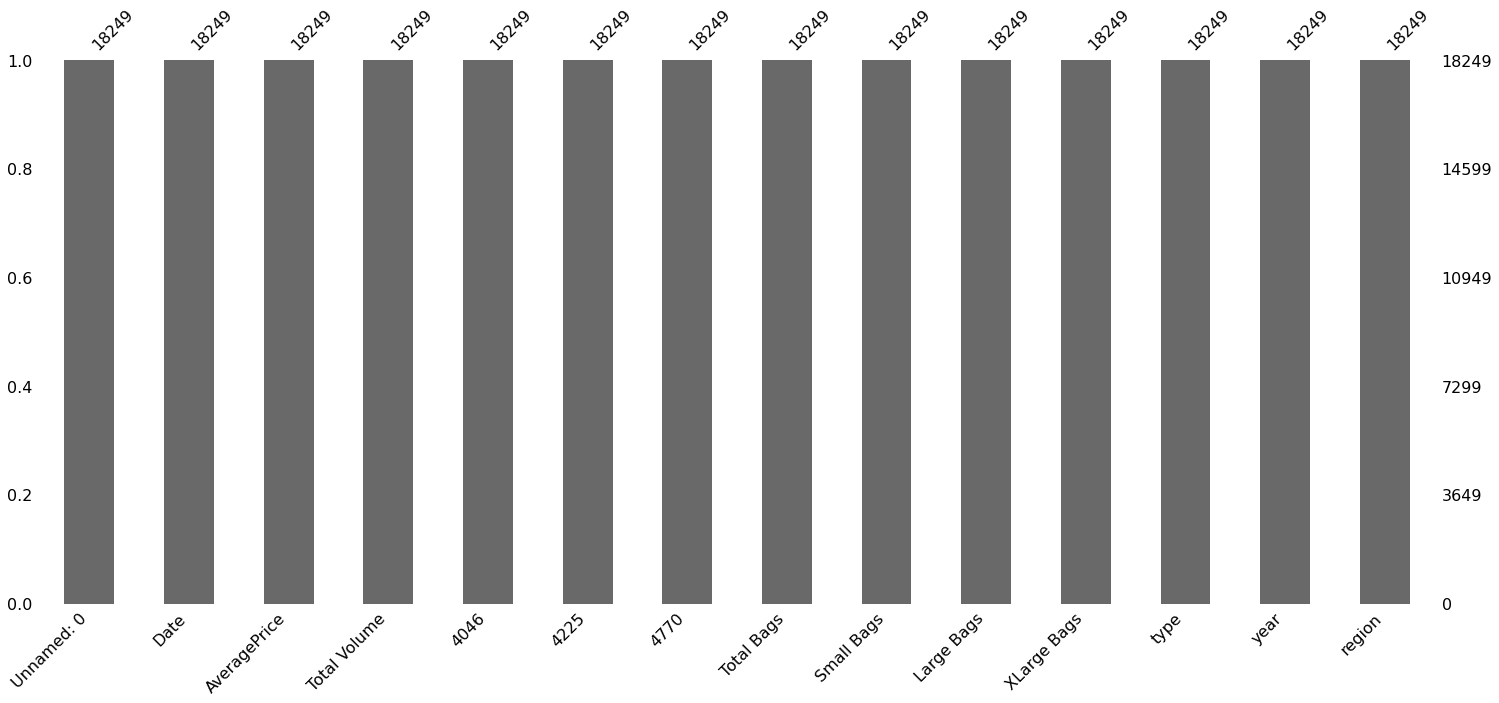

In [7]:
ms.bar(df);

# observation:
    1. total number of rows and columns are 18249 and 14
    2. there is no missing number or null value exists
    3. there are total 9 float 3 object and 2 interger columns are available in data set.
    

In [8]:
df.select_dtypes(include='object').head()

,Date,type,region
0,2015-12-27,conventional,Albany
1,2015-12-20,conventional,Albany
2,2015-12-13,conventional,Albany
3,2015-12-06,conventional,Albany
4,2015-11-29,conventional,Albany


# three object class are date,type and region

# EXPLORATORY DATA ANALYSIS:

In [9]:
df.shape

(18249, 14)

In [10]:
df['region'].nunique()

54

In [11]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

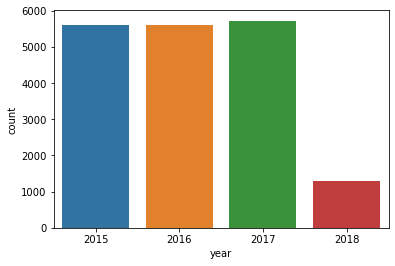

In [12]:
sns.countplot(df.year)

In [13]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

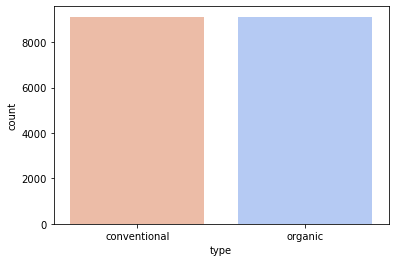

In [14]:
sns.countplot(df.type,palette='coolwarm_r')

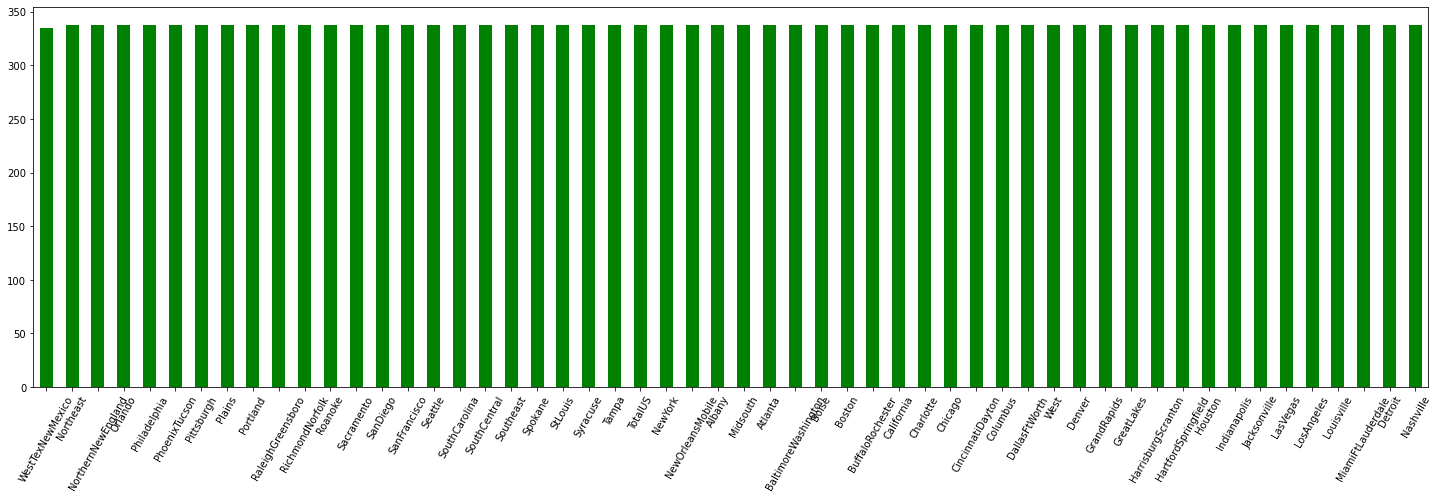

In [15]:
plt.figure(figsize=(25,7))
df.region.value_counts(ascending = True).plot(kind = 'bar', color='green');
plt.xticks(rotation = 60);

# popularity of avocado is almost same in every region 

# Comparision of year and 4046,4225,4770

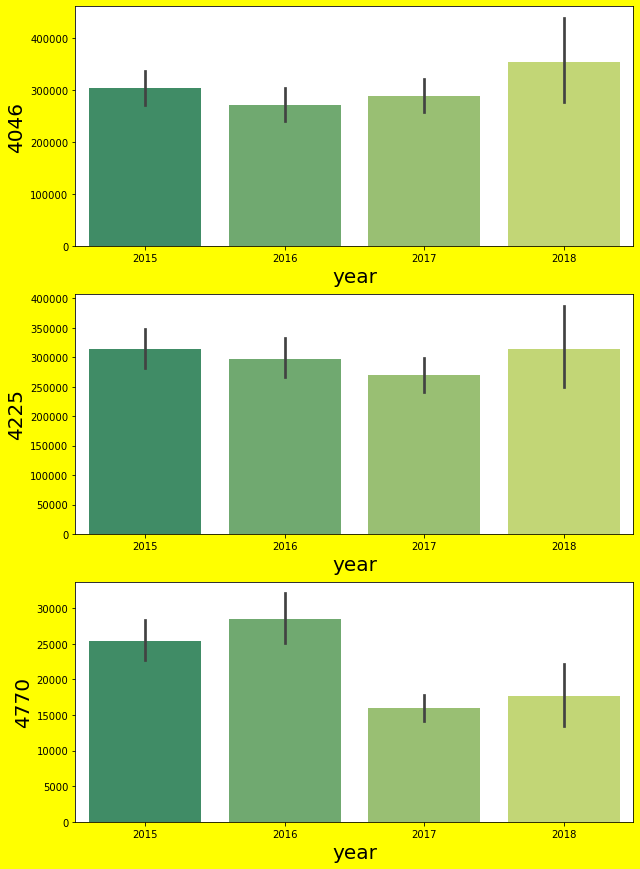

In [16]:
#comparison years vs variety
x_cols = df['year']
y_cols = df[['4046','4225','4770']]
plt.figure(figsize=(10,15),facecolor='yellow', edgecolor='b')
plotnum = 1
for cols in y_cols:
    plt.subplot(3,1,plotnum)
    sns.barplot(x_cols,y_cols[cols], palette='summer')
    plt.xlabel('year',fontsize=20)
    plt.ylabel(cols,fontsize=20)
    plotnum+=1
plt.show()

# observation
- PLU 4046 has shown increasing trend yearwise except in 2015 to 2016.
- PLU 4225 has shown decreasing trend from 2015 to 2017 but its production again increases in next year
- PLU 4770 has showh uneven trend yoy.

# Comparision of avaerage prices in different years

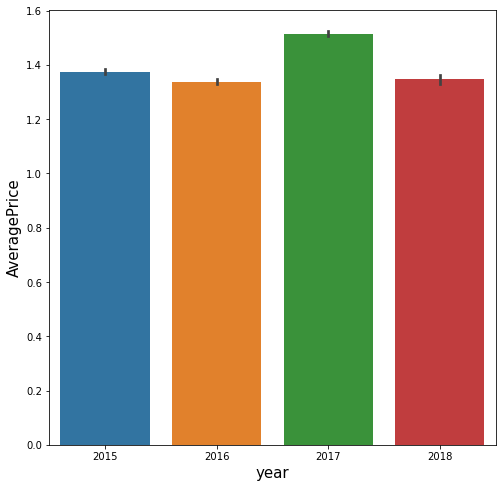

In [17]:
y_cols = df['AveragePrice']
x_cols = df[['year']]
plt.figure(figsize=(8,8),facecolor='white')
plotnum = 1
for cols in x_cols:
    plt.subplot(1,1,plotnum)
    sns.barplot(x_cols[cols],y_cols)
    plt.xlabel(cols,fontsize=15)
    plt.ylabel('AveragePrice',fontsize=15)
    plotnum+=1
plt.show()

# Average price of avocadi in the year 2017 is highest in comparison to other years.

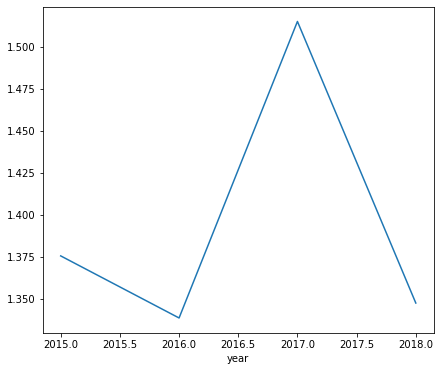

In [18]:
plt.figure(figsize=(7,6))
df.groupby('year')['AveragePrice'].mean().plot(kind='line');

# It has been observed clearly that the average price of avocado is declining from 2015 to 2016 but there is sharp increase in the pricein year 2017 which also represents its popularity.we also guess as avocado has medicinal property there might be some health concernsarouse in the year 2017 which increases its demand which led to increase in average price because after 2018 prices again falls.


In [19]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

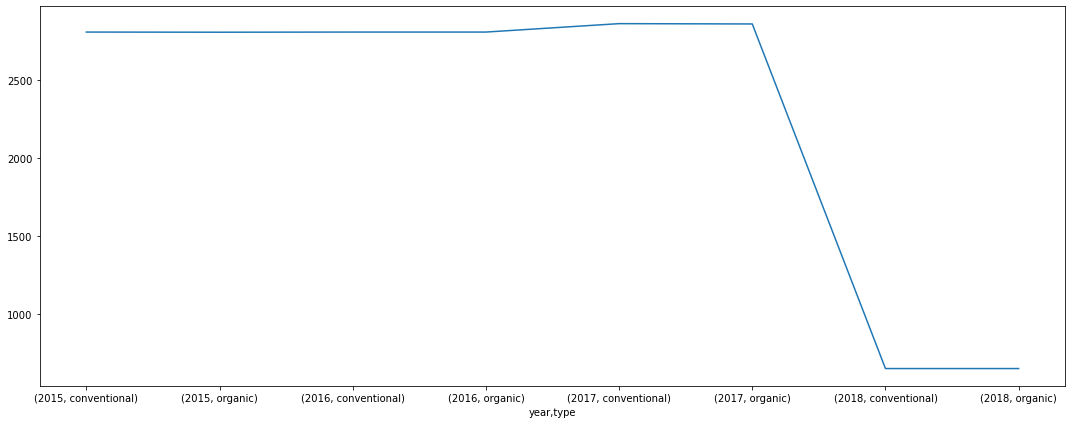

In [20]:
plt.figure(figsize=(15,6))
df.groupby('year')['type'].value_counts().plot()
plt.tight_layout()

# sudden dip in the production of conventional avocado in the year 2018

# Lets visualise the trend of production in month wise as its shows clear trend of up and down in average price

In [21]:
df['Date'] = pd.to_datetime(df['Date'])     
df['Day'] = df['Date'].apply(lambda d:d.day)
df['Month'] = df['Date'].apply(lambda m:m.month)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


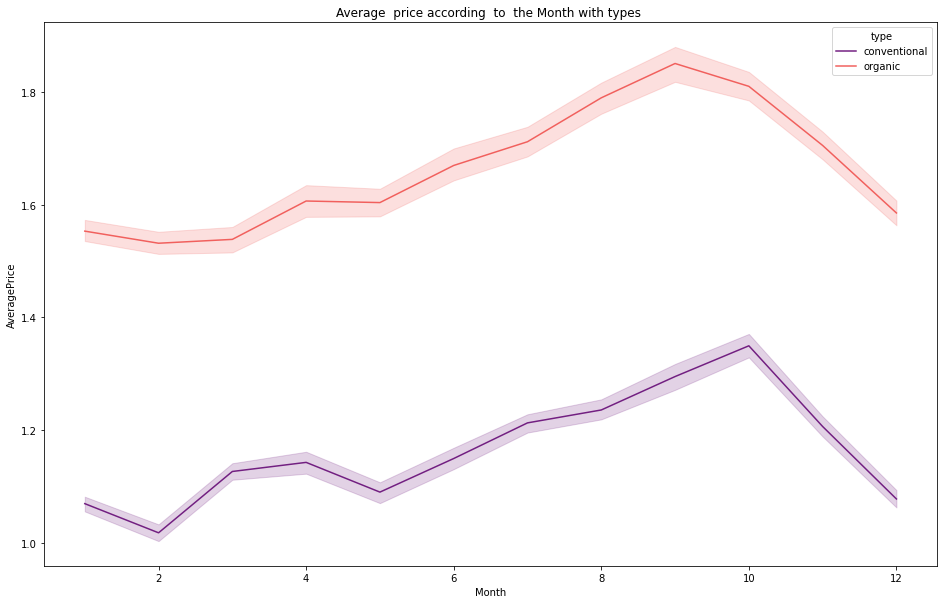

In [22]:
plt.figure(figsize=(16,10),facecolor='white')
sns.lineplot(x='Month',y='AveragePrice', hue = 'type',data=df, palette='magma')
plt.title('Average  price according  to  the Month with types ')
plt.show()

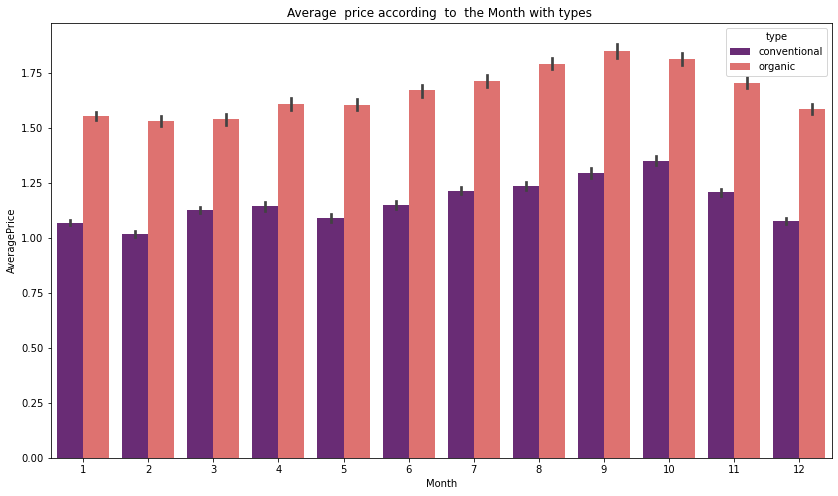

In [23]:
plt.figure(figsize=(14,8),facecolor='white')
sns.barplot(x='Month',y='AveragePrice', hue = 'type',data=df, palette='magma')
plt.title('Average  price according  to  the Month with types ')
plt.show()

# observation
- average price of both conventional and organic avocada has shown an increasing trend from 2nd to 10th of the month buttherafter price has declining

# checking distribution of average price

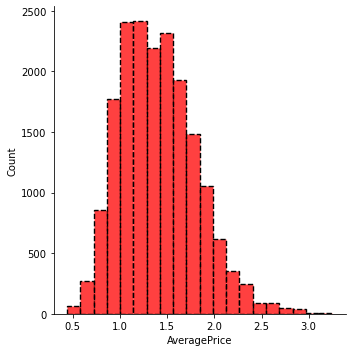

In [24]:
sns.displot(data=df,x='AveragePrice',bins=20,kde=False,
            color='red',edgecolor='black',lw=4,ls='--')

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

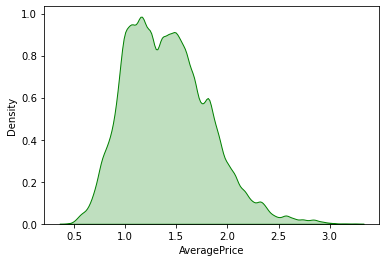

In [25]:
sns.kdeplot(data=df,x='AveragePrice',bw_adjust=0.5,shade=True,color='green')

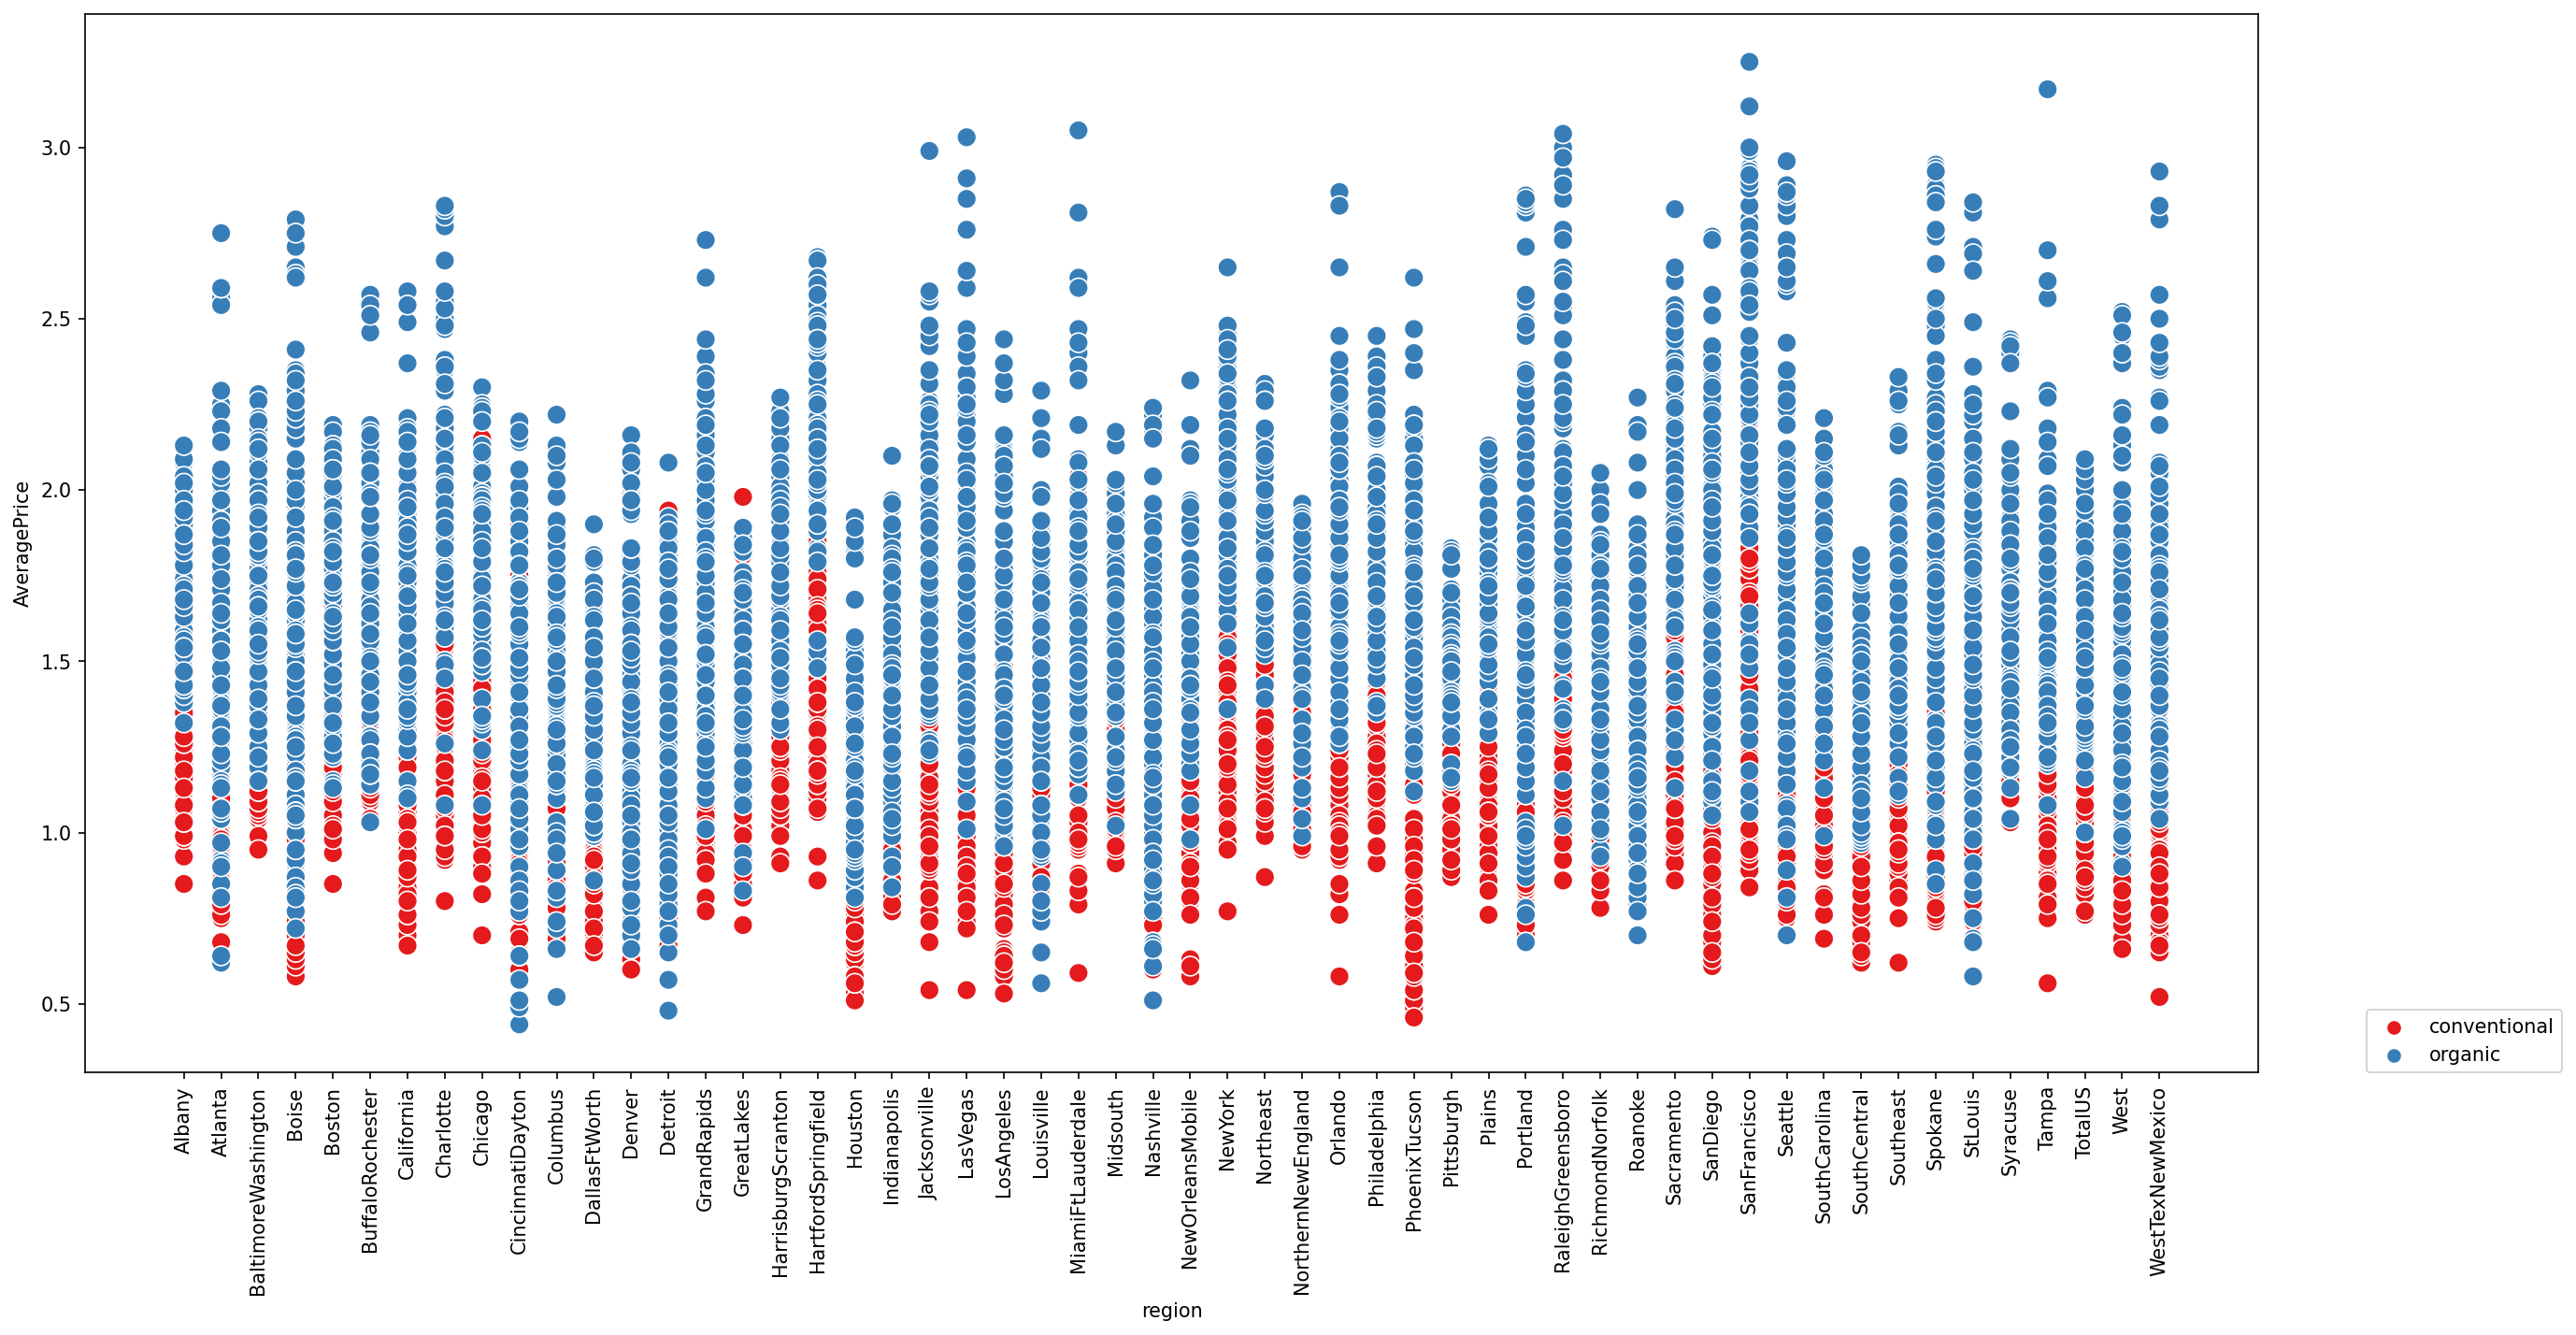

In [26]:
plt.figure(figsize=(20,10),dpi=150)
sns.scatterplot(x='region',y='AveragePrice',data=df,hue='type',palette='Set1',s=100)
plt.xticks(rotation=90)
plt.legend(loc=(1.05,0))

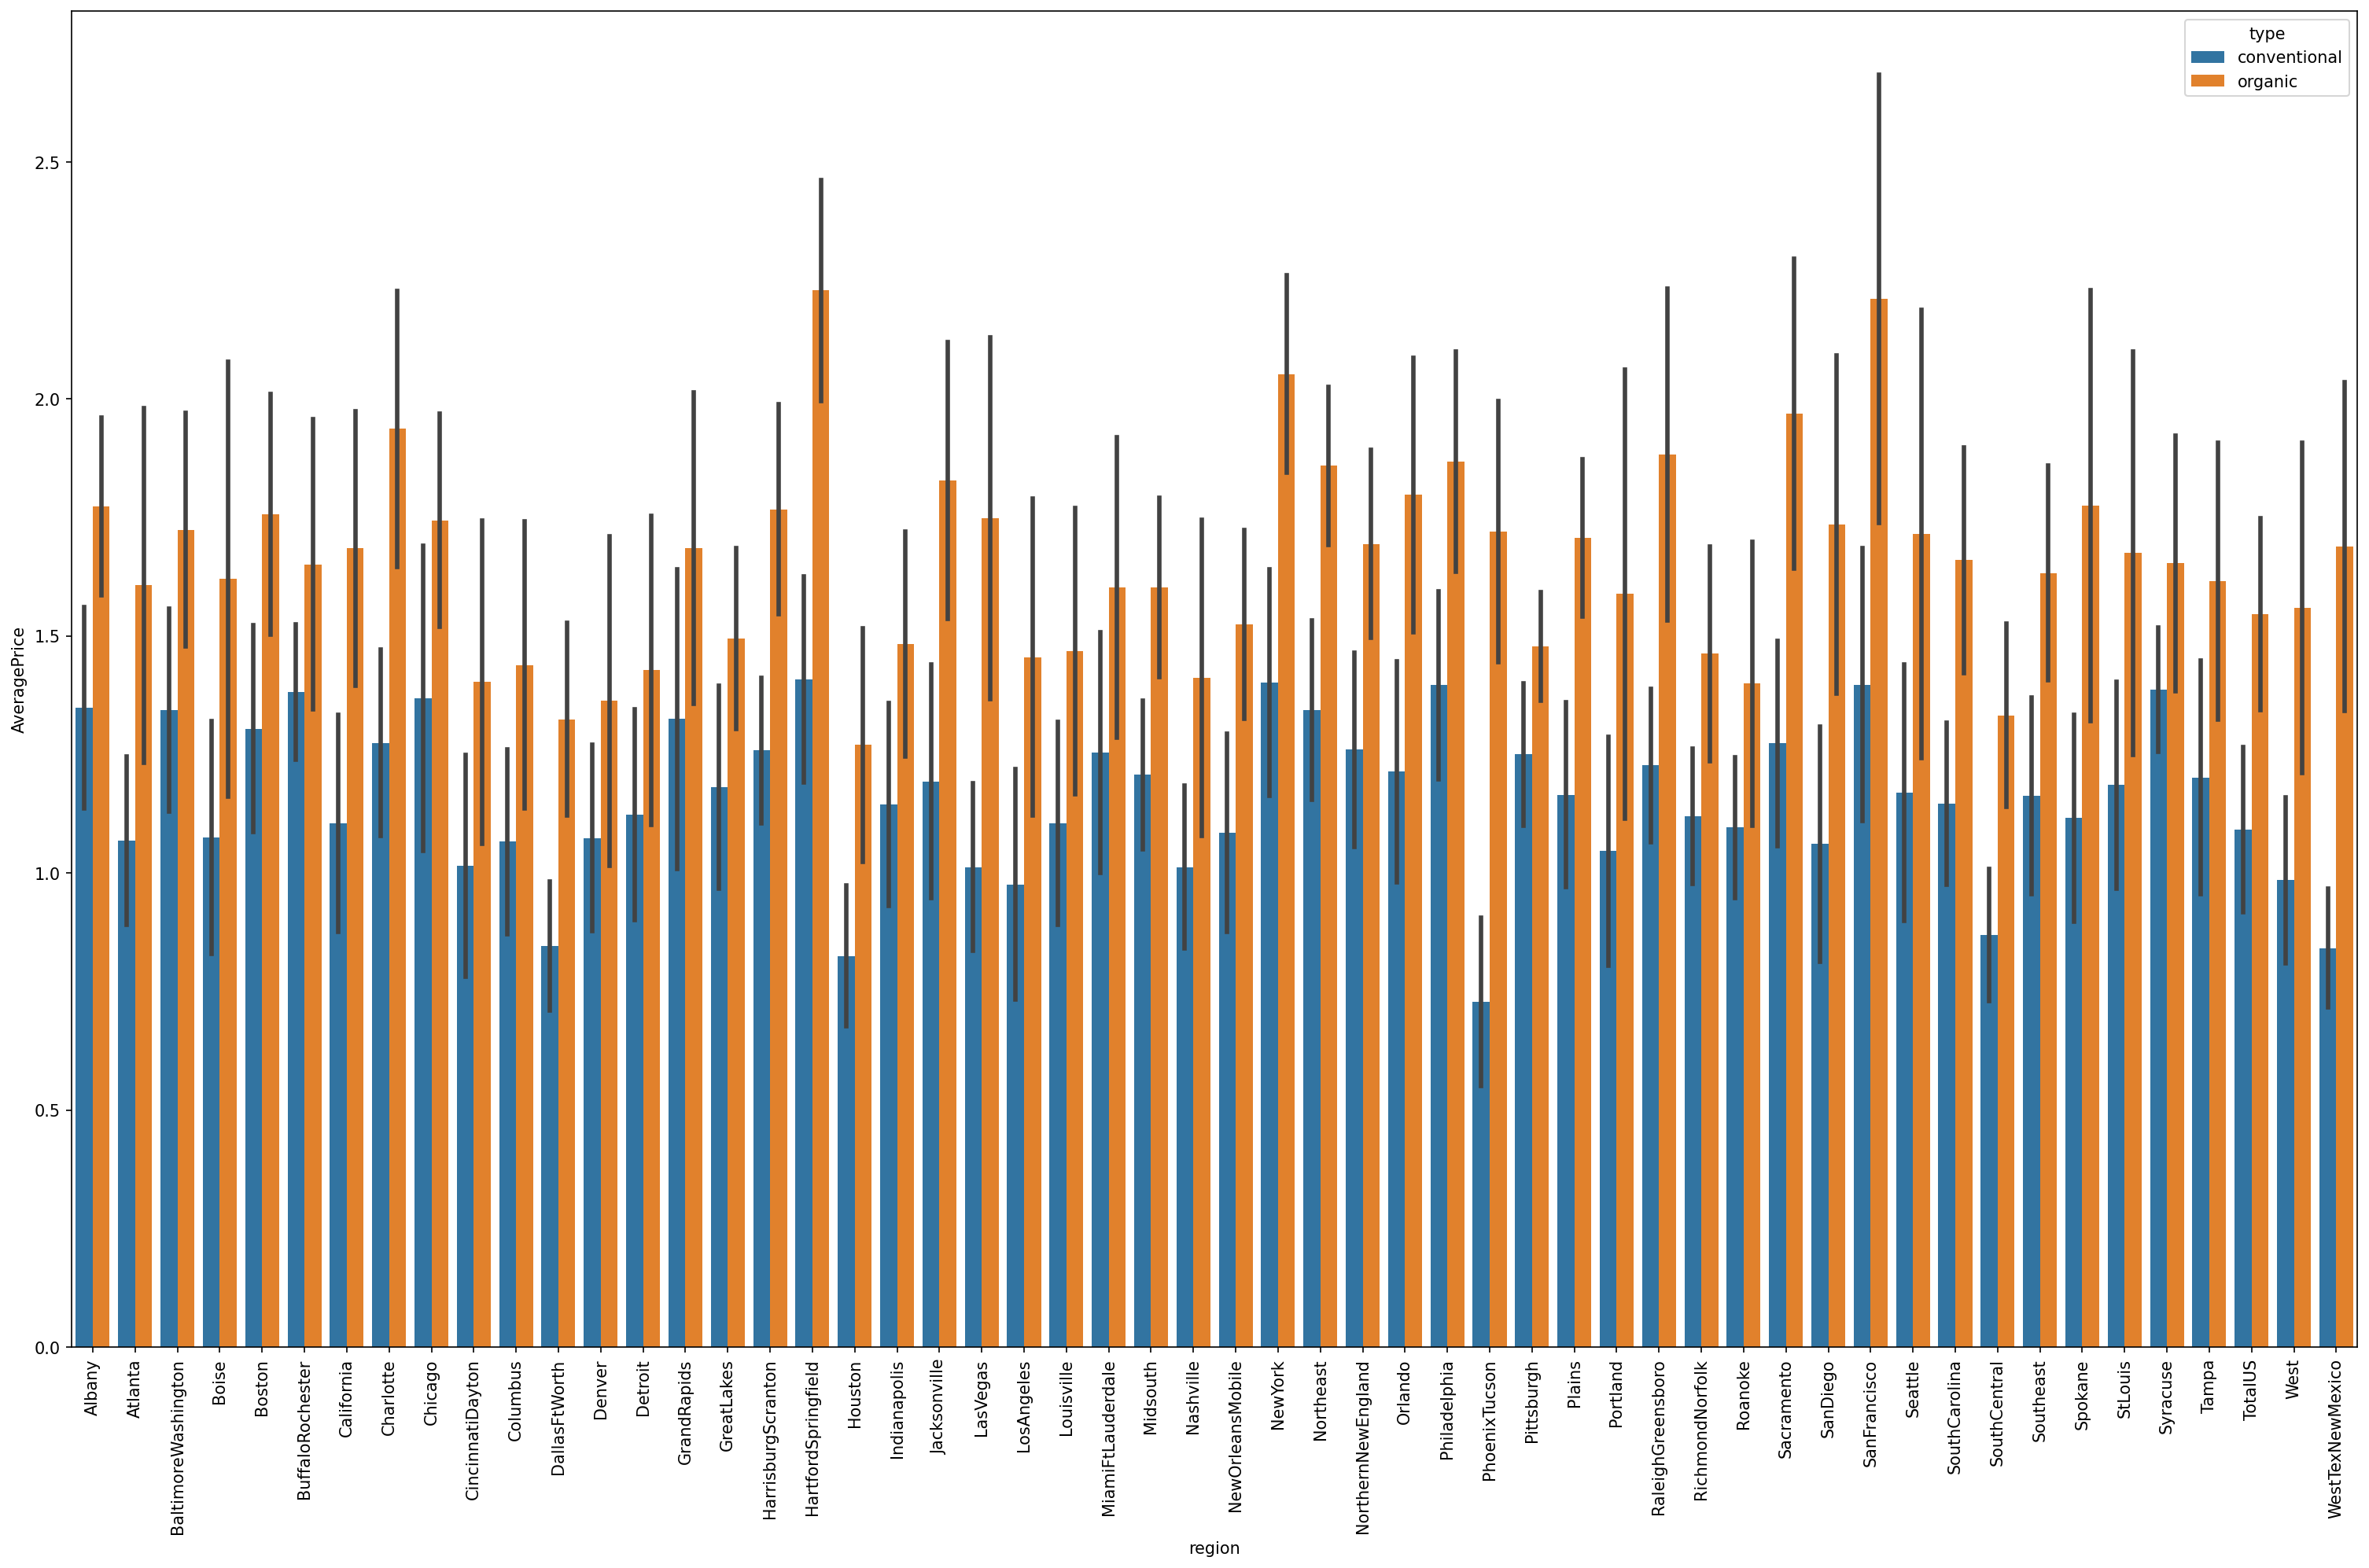

In [27]:
plt.figure(figsize=(25,15),dpi=150)
sns.barplot(x='region',y='AveragePrice',data=df,estimator=np.mean,ci='sd',hue='type')
plt.xticks(rotation=90,);

# As it has been clearly observed from above two graph that the average price of an organic avocadi is higher in every region as also we know that theprice of organic farming is costly than traditional one.

<Figure size 3000x2250 with 0 Axes>

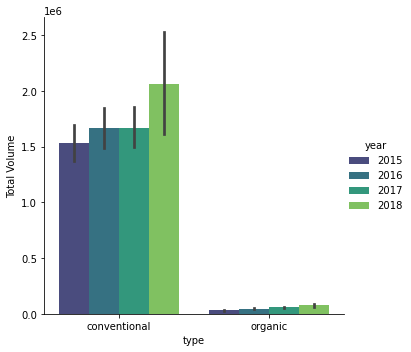

In [28]:
plt.figure(figsize=(20,15),dpi=150)
sns.catplot(data=df,x='type',y='Total Volume',hue='year',kind='bar',palette='viridis');

# it has been clearly observed that total volume of production year wise is increasing for both conventional type and organic typeof avocado but the volume of production of organic is too less as compare to traditional.

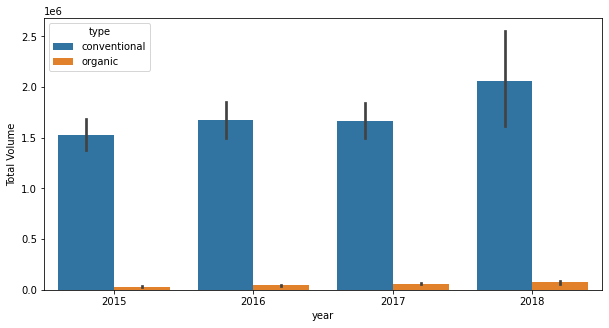

In [29]:
#Visulizing Year vs Total Volume
plt.figure(figsize=(10,5))
sns.barplot(y = 'Total Volume', x = 'year',hue='type', data = df)
plt.show()

<AxesSubplot:xlabel='4046', ylabel='Total Volume'>

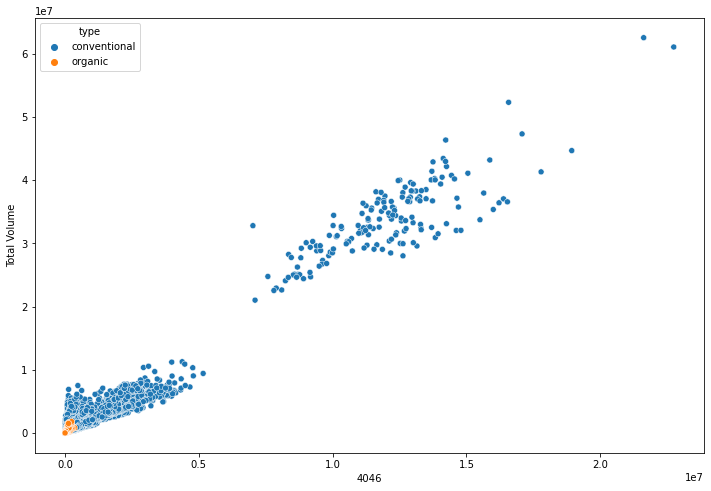

In [30]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='4046',y='Total Volume',data=df,hue='type')

<AxesSubplot:xlabel='4225', ylabel='Total Volume'>

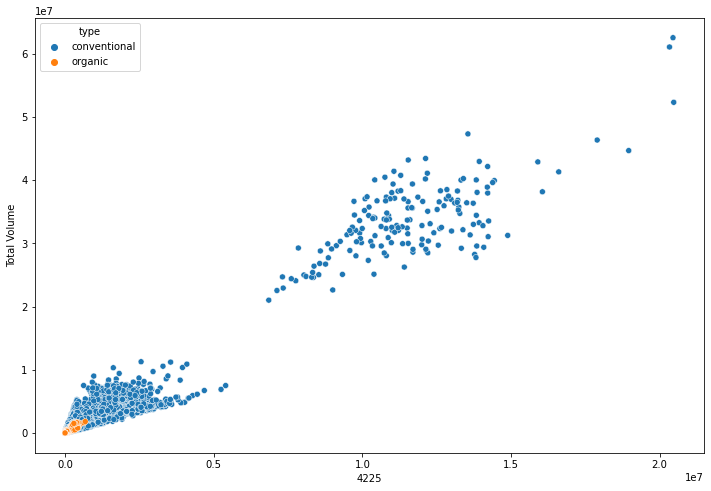

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='4225',y='Total Volume',data=df,hue='type')

<AxesSubplot:xlabel='4770', ylabel='Total Volume'>

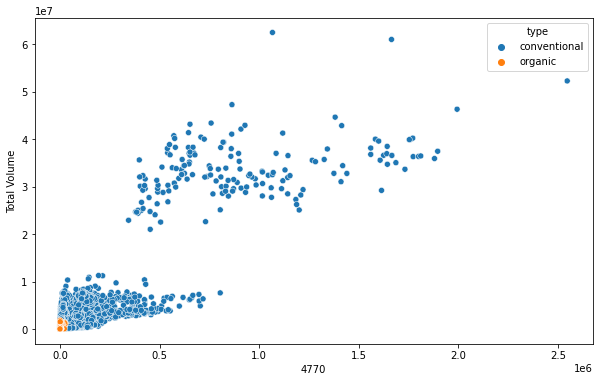

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='4770',y='Total Volume',data=df,hue='type')

# observation
- from the above three graph we conclude that total number of avocado sold contain very few percentage of organic avocado of variety
4046,4770 and 4225.

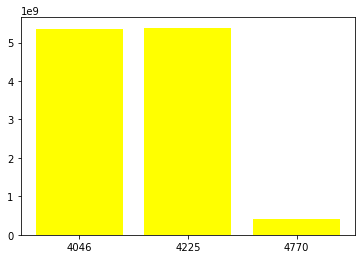

In [33]:
#Checking category wise avacado
plt.bar(['4046', '4225', '4770'], [df['4046'].sum(), df['4225'].sum(), df['4770'].sum()], color = 'yellow')
plt.show()

In [34]:
print('Total quality of 4046 avocado sold is:',df['4046'].sum())
print('Total quality of 4225 avocado sold is:',df['4225'].sum())
print('Total quality of 4770 avocado sold is:',df['4770'].sum())
print('quantity sold is in following order: 4225 > 4046 > 4770')
      

Total quality of 4046 avocado sold is: 5347110739.26
Total quality of 4225 avocado sold is: 5386275717.93
Total quality of 4770 avocado sold is: 416802342.12999994
quantity sold is in following order: 4225 > 4046 > 4770


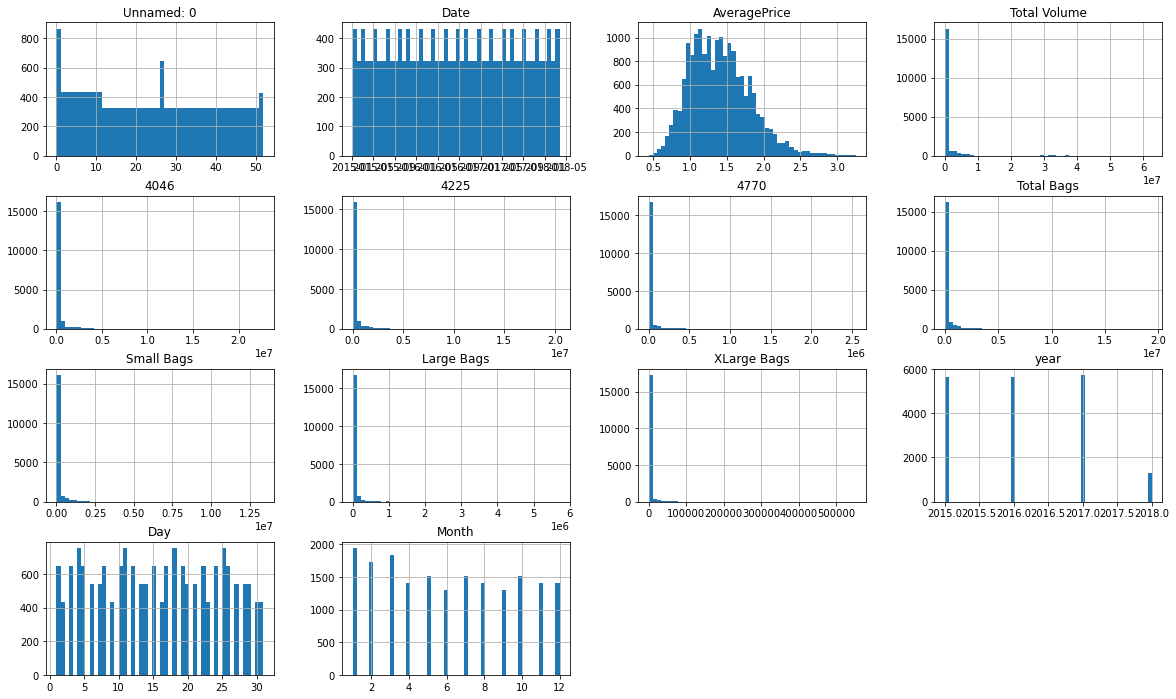

In [35]:
#Ploting histogram 
df.hist(figsize = (20,12), bins = 50)
plt.show()

# DATA PREPROCESSING

In [36]:
#dropping the unnessary columns

df.drop(['Unnamed: 0','Date'], axis = 1, inplace = True)

In [37]:
print(df.head())
print(df.shape)

   AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Day  Month  
0     8603.62       93.25          0.0  conventional  2015  Albany   27     12  
1     9408.07       97.49          0.0  conventional  2015  Albany   20     12  
2     8042.21      103.14          0.0  conventional  2015  Albany   13     12  
3     5677.40      133.76          0.0  conventional  2015  Albany    6     12  
4     5986.26      197.69          0.0  conventional  2015  Albany   29     11  
(18249, 14)


In [38]:
#applying ordinal encoder
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
cols = ['type','region']
df[cols] = df[cols].apply(enc.fit_transform)

In [39]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,29,11


In [40]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.027386,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.009747,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.010159,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.012393,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.009009,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.004988,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.003870,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.008352,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,0.000319,-0.012969
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000013,-0.000085


<AxesSubplot:>

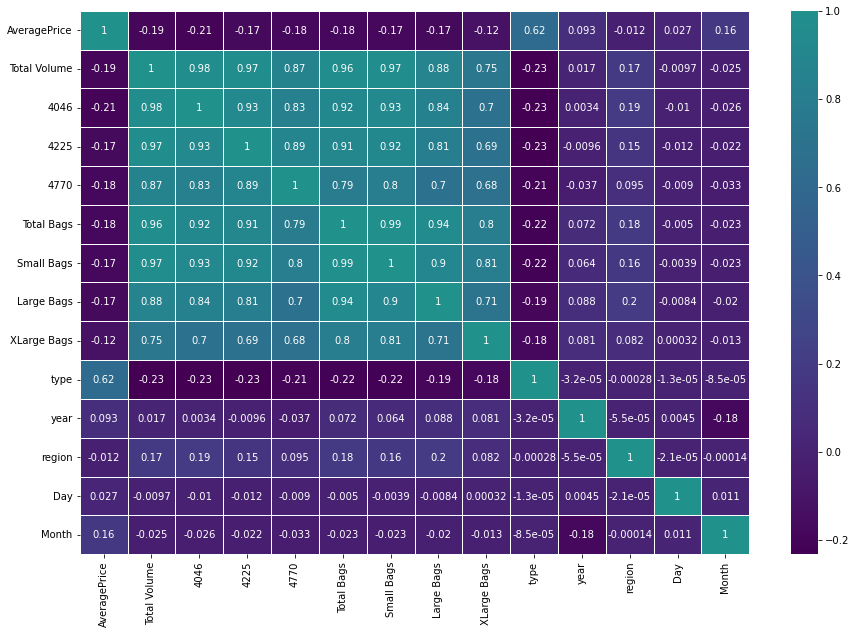

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=0.5,annot=True,cmap='viridis',center=1)

# many features have strong correlation among themselves as highlighted in green colour

In [42]:
#checking skewness
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Day              0.014310
Month            0.106617
dtype: float64

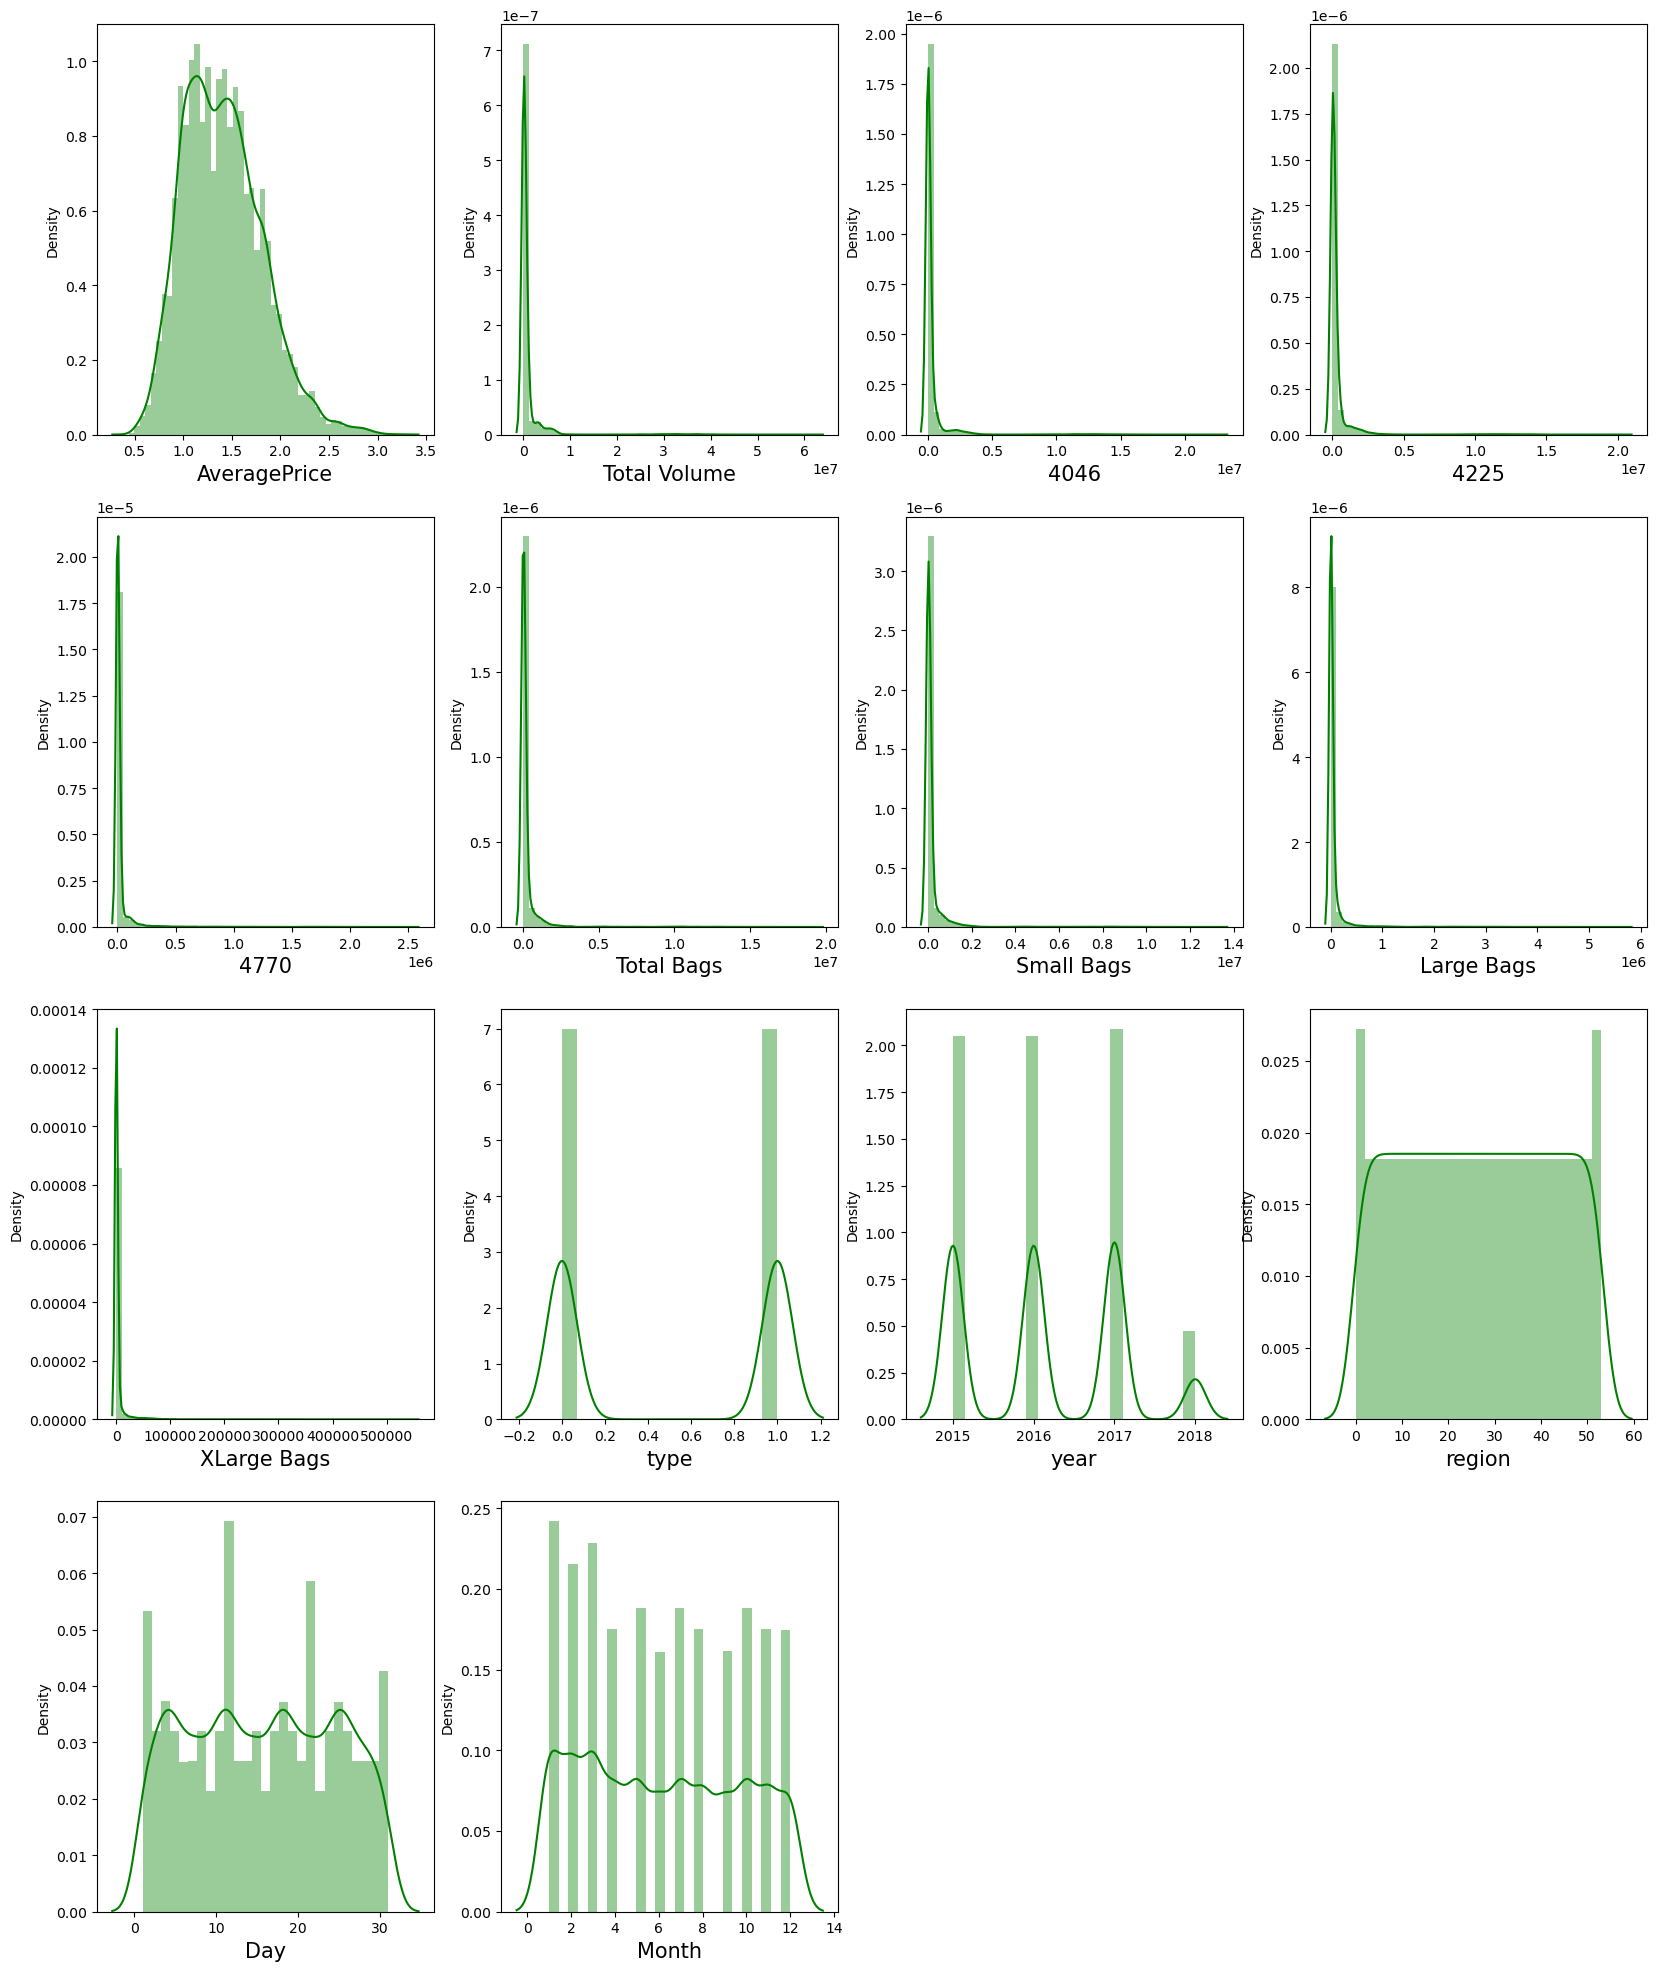

In [43]:
plt.figure(figsize=(20,25),dpi=100)
graph = 1
for column in df:
    if graph<=16:
        plt.subplot(4,4,graph)
        sns.distplot(df[column],color='g')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

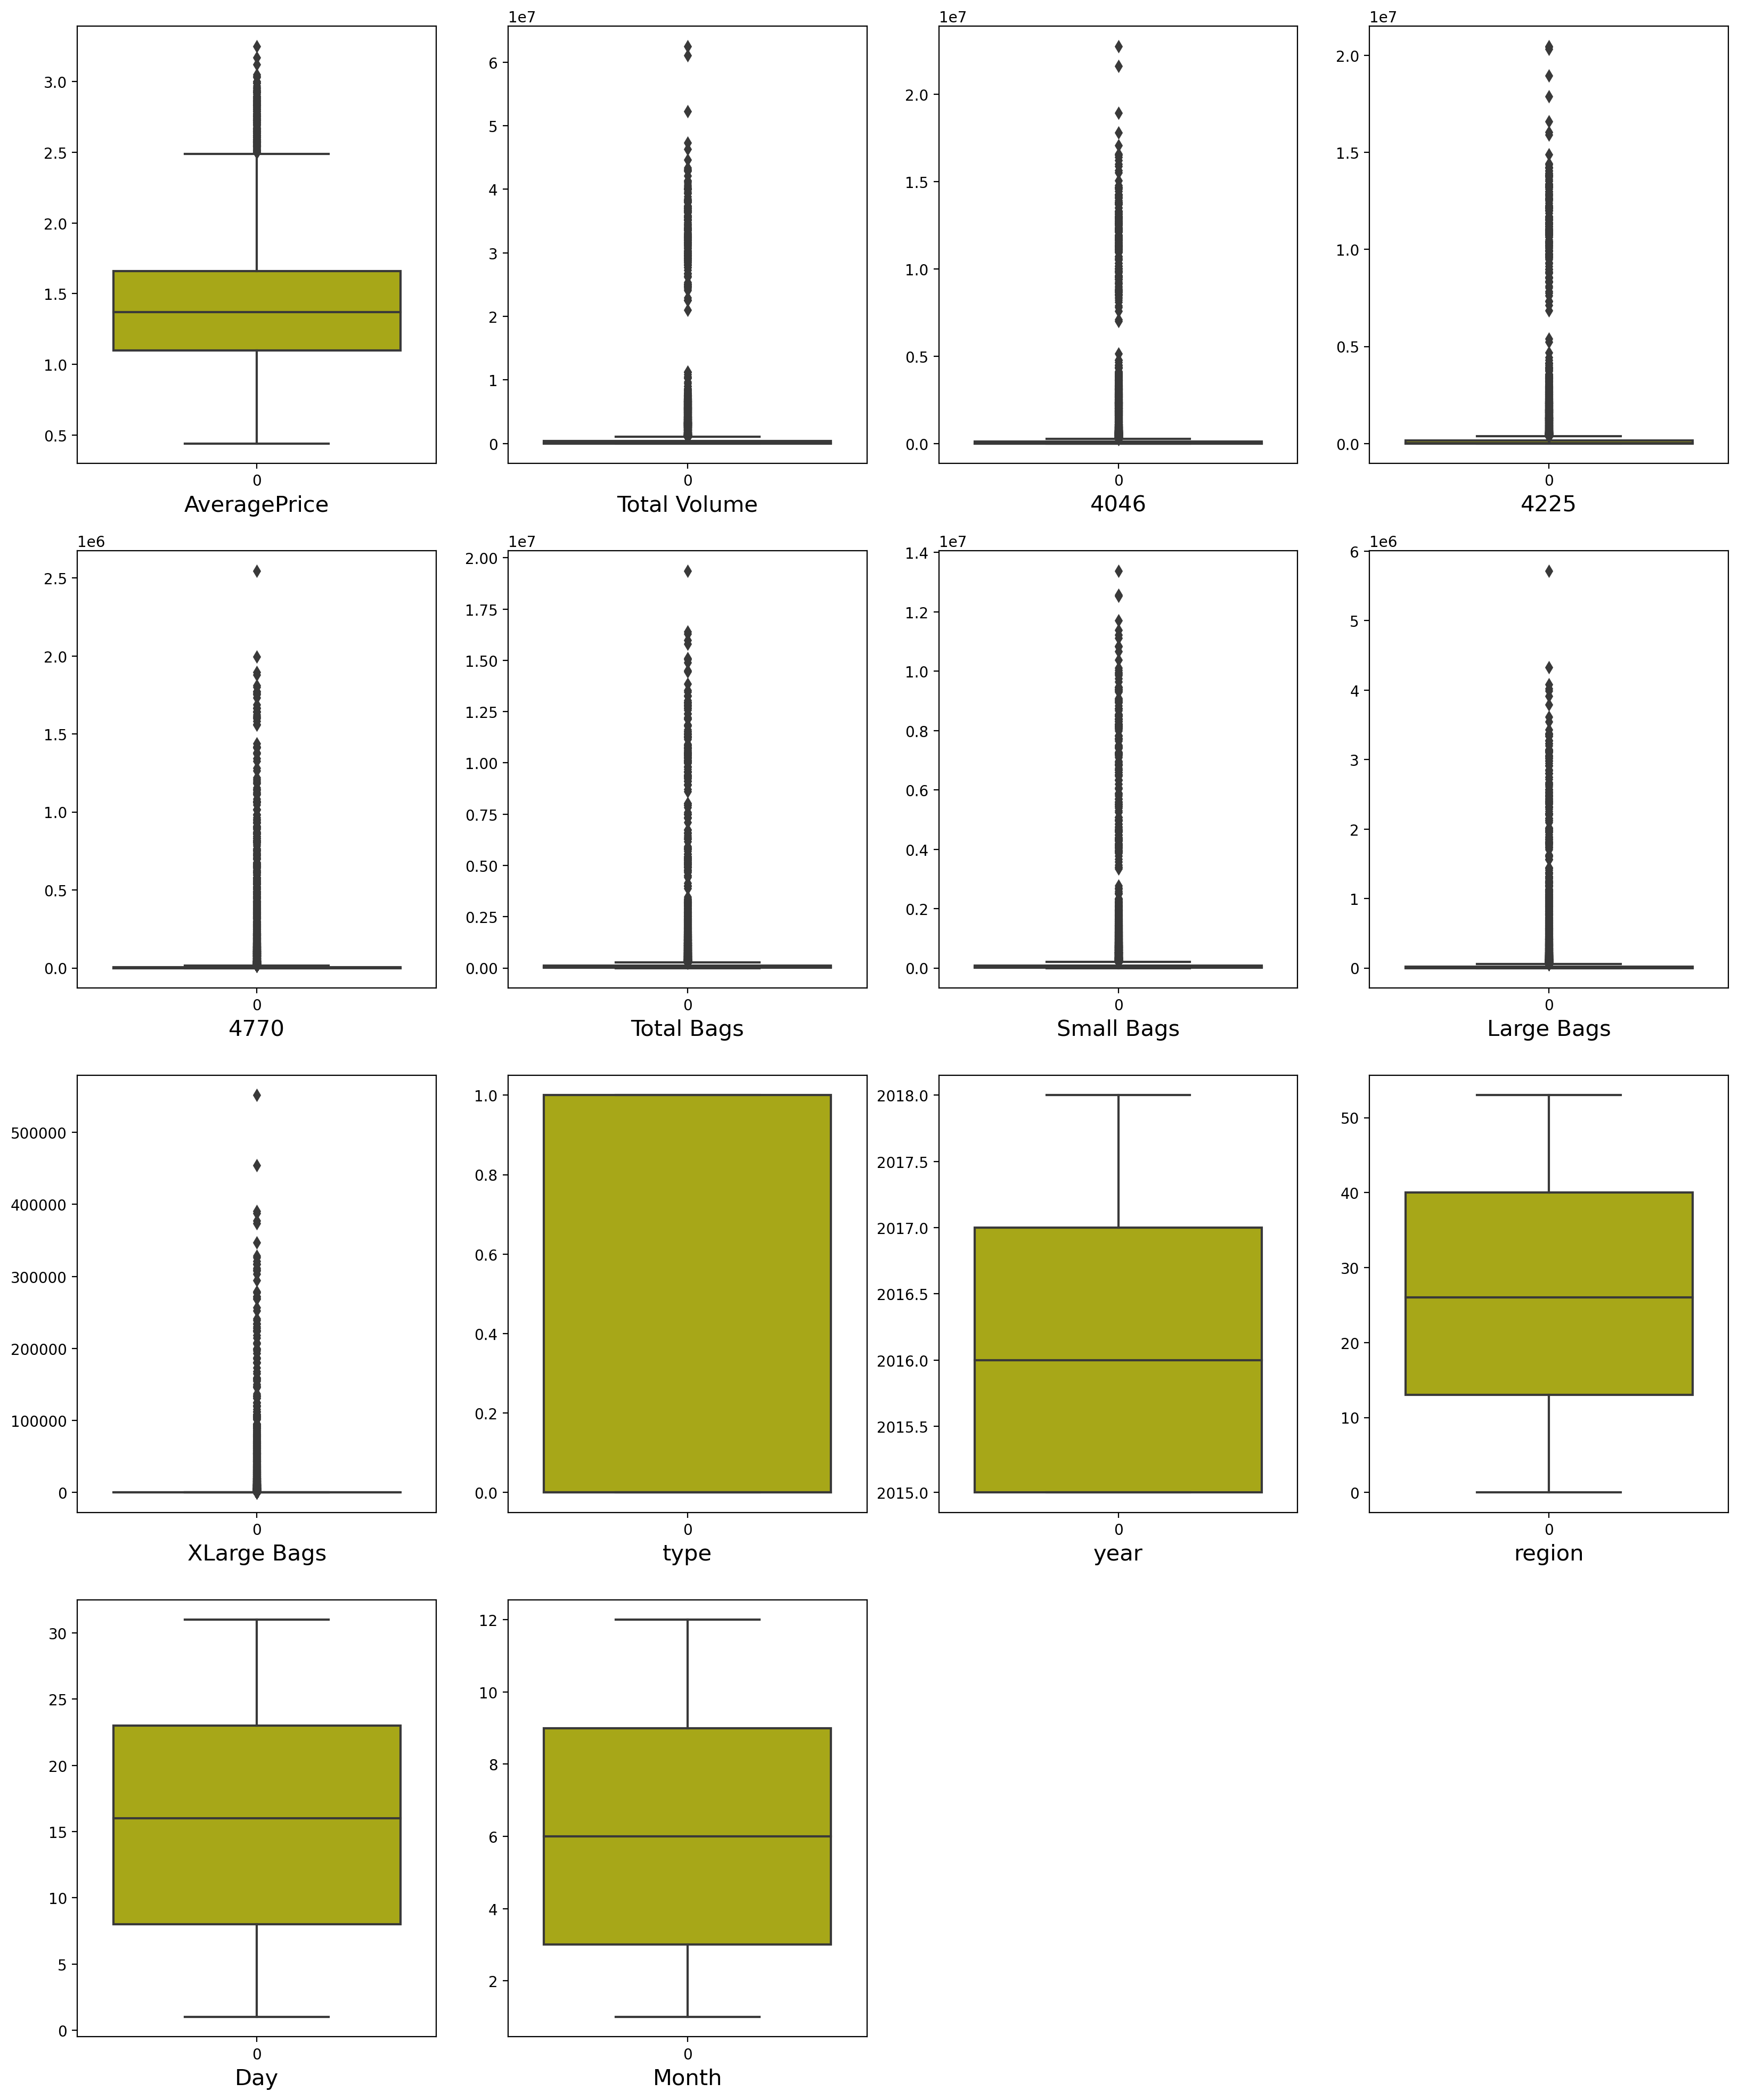

In [44]:
#Check for outliers using box plot

plt.figure(figsize=(20,25),dpi=200)
graph = 1
for column in df:
    if graph<=16:
        plt.subplot(4,4,graph)
        sns.boxplot(data=df[column],color='y')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

# excpet day,month,region,year,type all other fetures have outliers.

# Using z score method to remove outliers

In [45]:
from scipy.stats import zscore

In [46]:
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis=1)]
new_df.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53,7,1


In [47]:
new_df.shape

(17651, 14)

In [48]:
df.shape

(18249, 14)

In [49]:
# Let's check the the data loss
data_loss = (18249-17651)/18249*100
print('The  Data_loss from Zscore  is :',data_loss)
print("This is acceptable  range ")

The  Data_loss from Zscore  is : 3.276891884486821
This is acceptable  range 


# IQR METHOD LED TO HUGE DATA  LOSS SO I CANT APPLY IQR METHOD

In [50]:
new_df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Day             0.011778
Month           0.107408
dtype: float64

In [51]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Day              0.014310
Month            0.106617
dtype: float64

# as we compare above two data set we find that the skwness has improved too much .lets check from the plot also

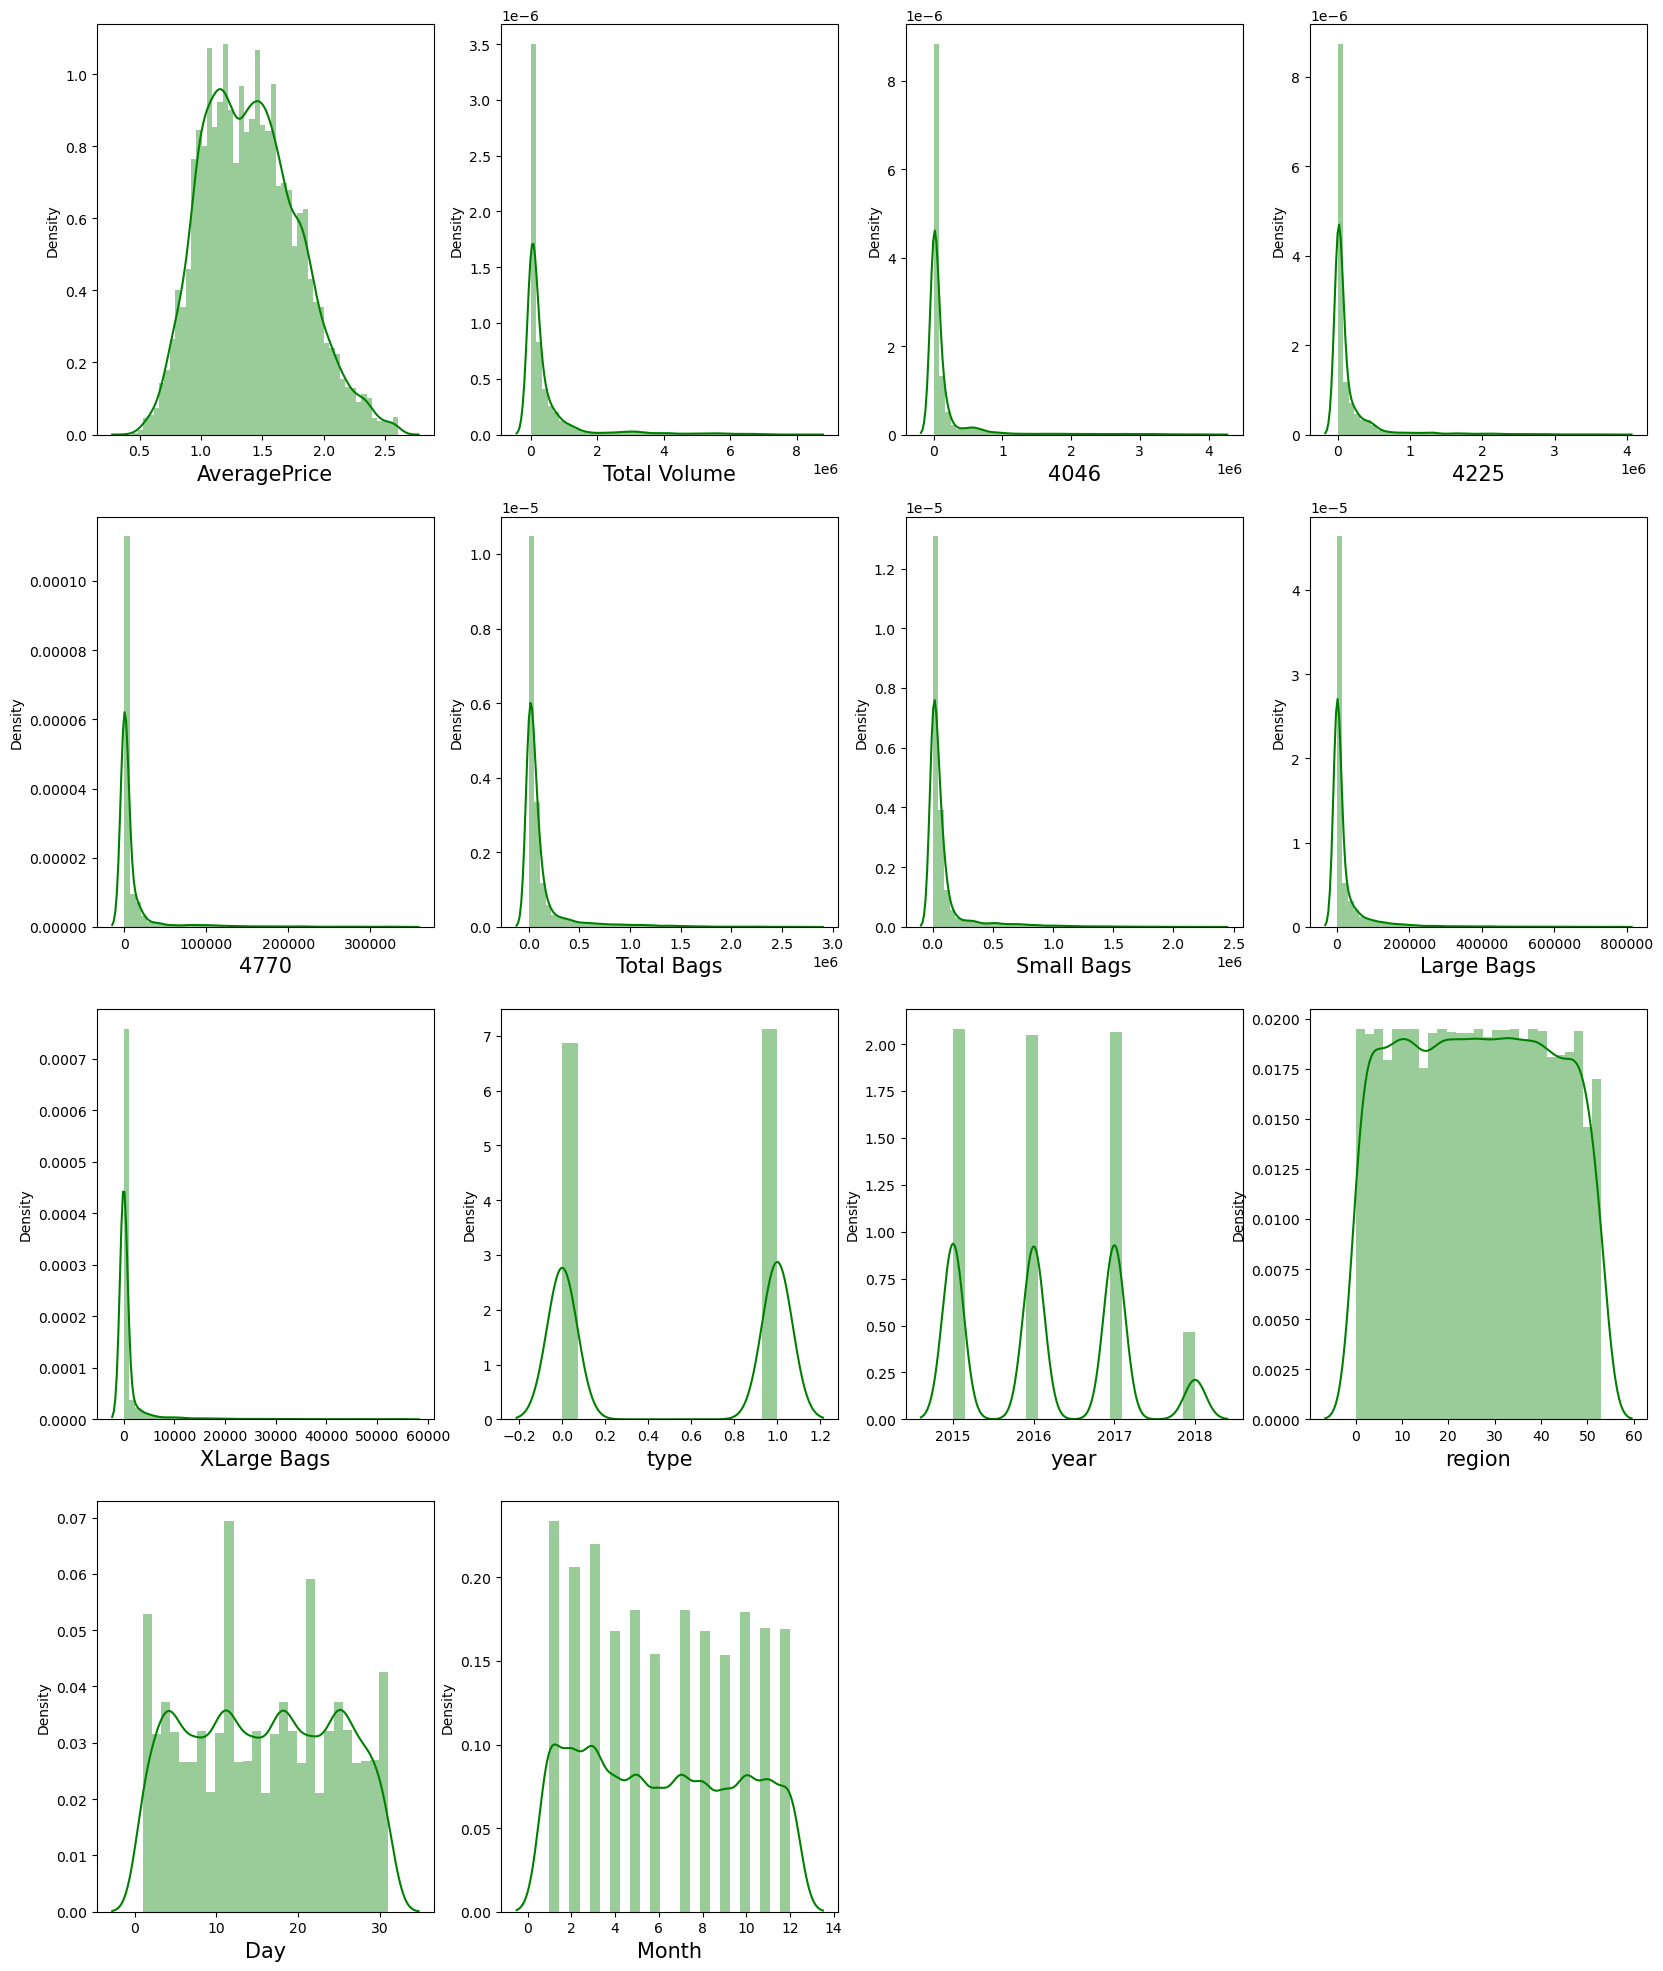

In [52]:
plt.figure(figsize=(20,25),dpi=100)
graph = 1
for column in new_df:
    if graph<=16:
        plt.subplot(4,4,graph)
        sns.distplot(new_df[column],color='g')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

# using power transformer method to reduce skweness further

In [53]:
x = new_df.drop(columns = 'AveragePrice')
y = new_df['AveragePrice']

In [54]:
x.shape

(17651, 13)

In [55]:
y.shape

(17651,)

In [56]:
#Importing Standrd Scaler
from sklearn.preprocessing import StandardScaler
#scaling the data
scaler = StandardScaler()
sc = scaler.fit_transform(x)

# now checking for multicollinearity using VIF method

In [57]:
#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(sc,i) for i in range(sc.shape[1])]

vif['features'] = x.columns


In [59]:
vif

,vif,features
0,4.127969e+08,Total Volume
1,7.777070e+07,4046
2,6.410838e+07,4225
3,4.787390e+05,4770
4,1.924615e+13,Total Bags
5,1.275807e+13,Small Bags
6,1.290985e+12,Large Bags
7,6.647527e+09,XLarge Bags
8,1.232129e+00,type
9,1.132830e+00,year


In [60]:
#Import power transform
from sklearn.preprocessing import power_transform
transform  = power_transform(x)

In [61]:
df2 = pd.DataFrame(transform)
df2.columns = x.columns

In [62]:
df2.skew()

Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.227731
region         -0.257799
Day            -0.208926
Month          -0.146554
dtype: float64

# all the multicollinearity removed and data liiks much better now

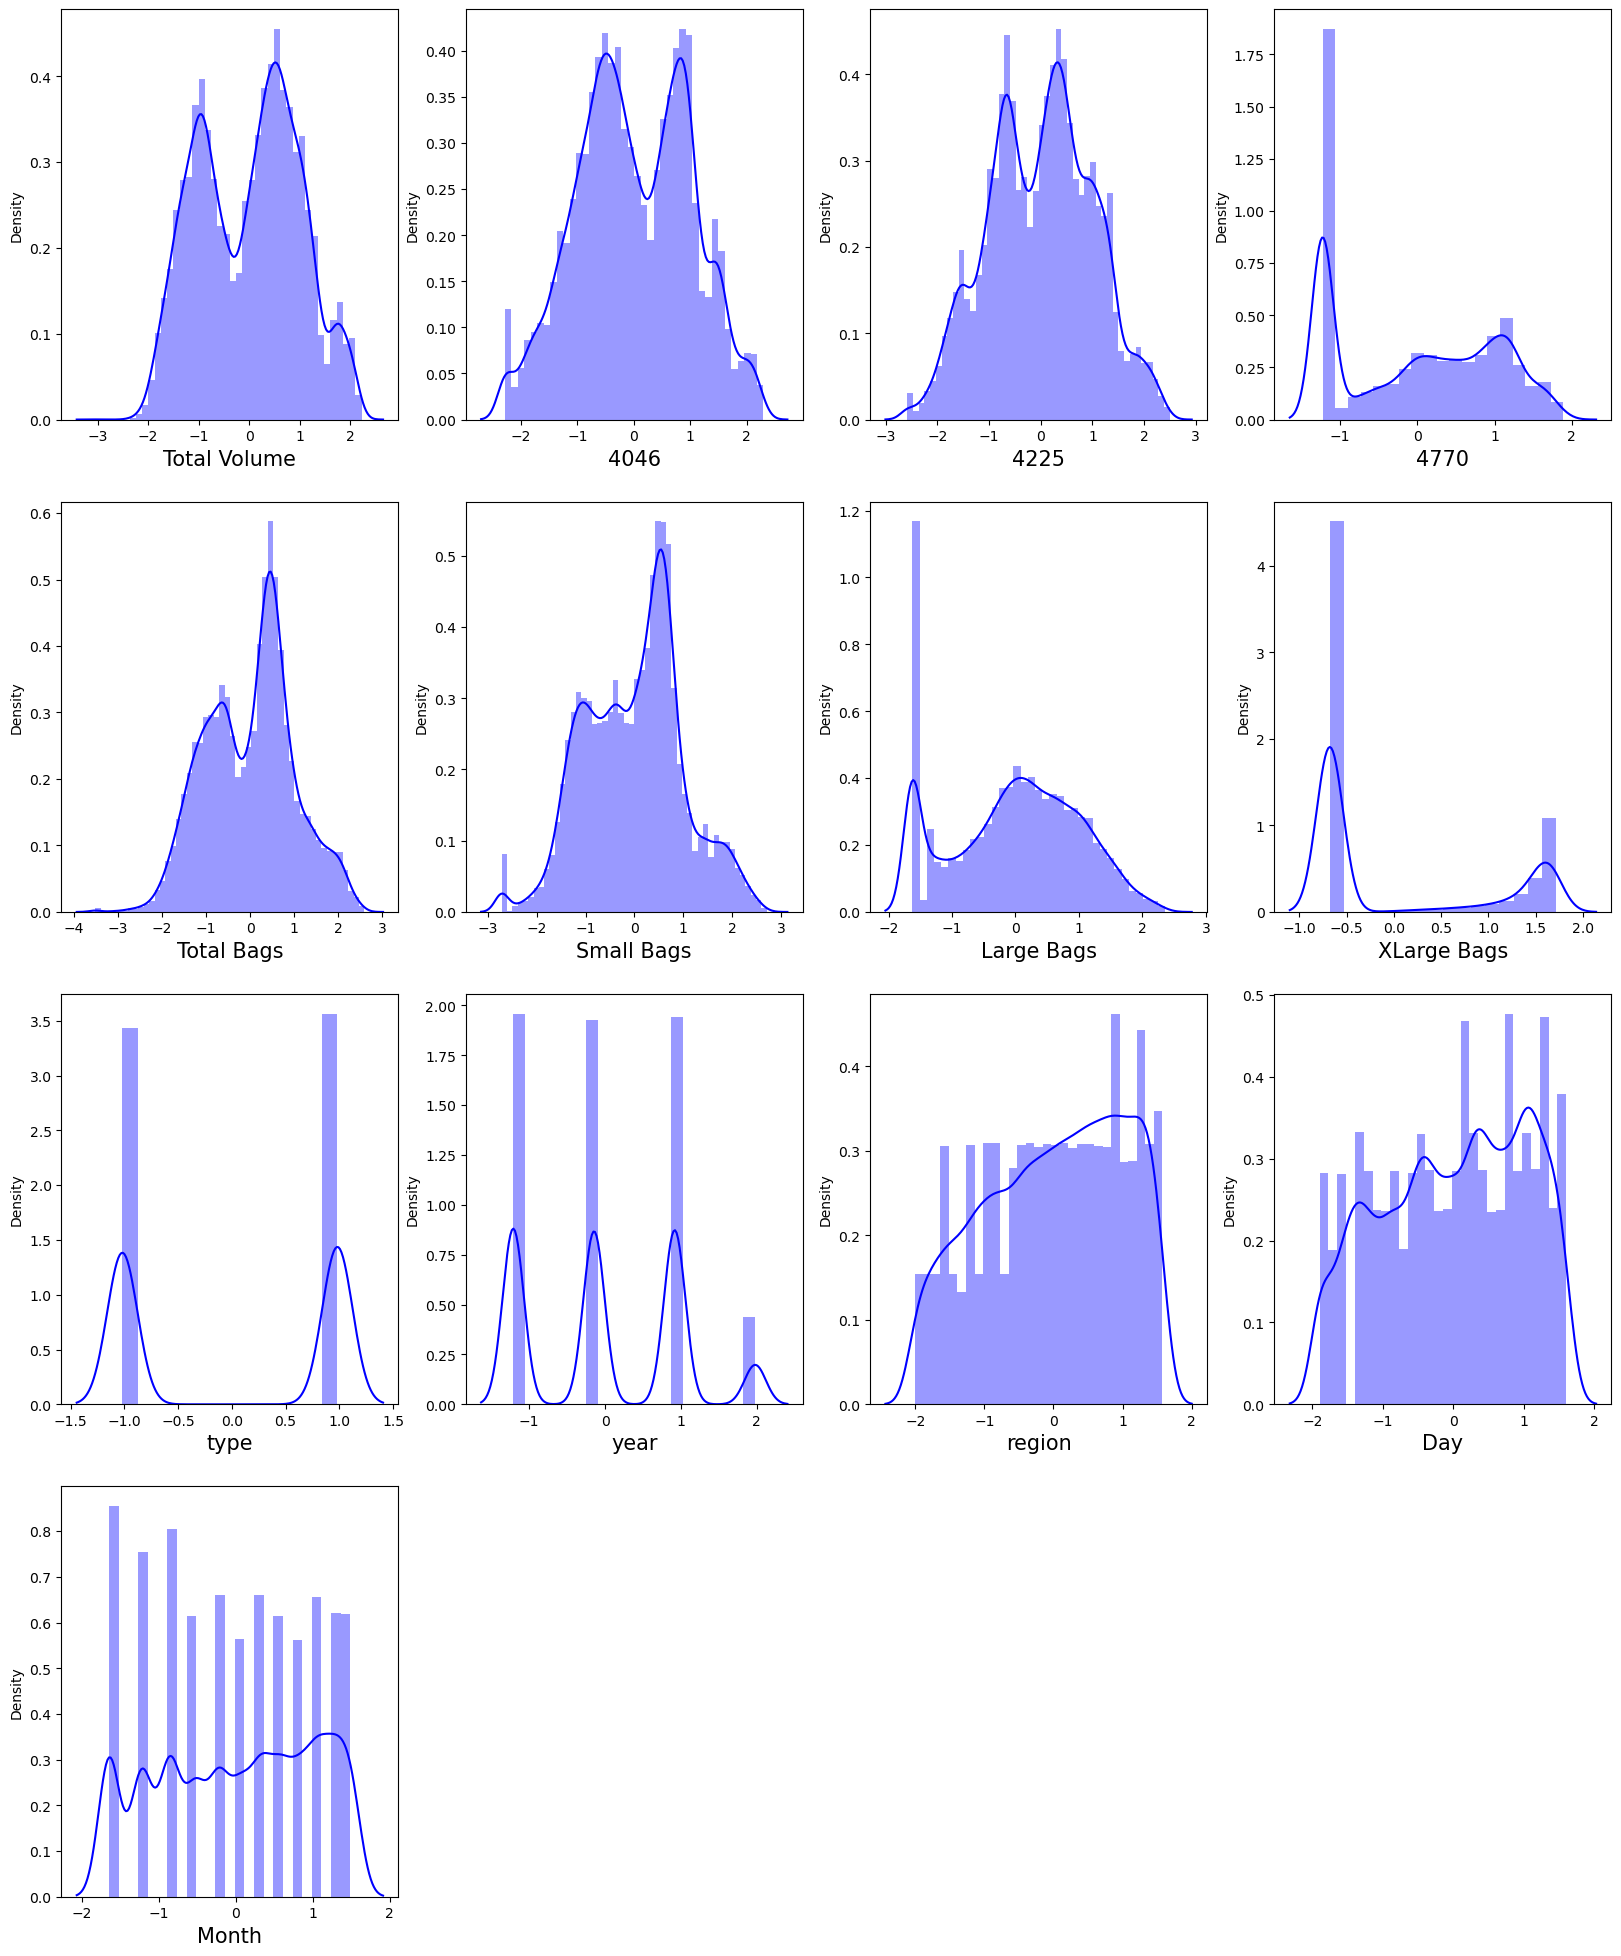

In [63]:
plt.figure(figsize=(20,25),dpi=100)
graph = 1
for column in df2:
    if graph<=16:
        plt.subplot(4,4,graph)
        sns.distplot(df2[column],color='b')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

# now plot also show normal distribution.

# MODEL BUILDINGS USING VARIOUS METHODS
1.  REGRESSOR MODEL BUILDING

In [64]:
#Import regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

#Import Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [65]:
x_scaled =  scaler.fit_transform(df2)

In [66]:
#Train Test Split / finding best random_state for my model
LR = LinearRegression()

for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled, y ,random_state = i,test_size = 0.2)
    LR.fit(x_train,y_train)
    train_pred = LR.predict(x_train)
    test_pred = LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2) == round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X' * 50,'\n')

At random state  4 The model performance very well
At random state:  4
Test R2 score is:  0.57
Train R2 score is:  0.57
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  8 The model performance very well
At random state:  8
Test R2 score is:  0.57
Train R2 score is:  0.57
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  9 The model performance very well
At random state:  9
Test R2 score is:  0.57
Train R2 score is:  0.57
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  11 The model performance very well
At random state:  11
Test R2 score is:  0.57
Train R2 score is:  0.57
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  13 The model performance very well
At random state:  13
Test R2 score is:  0.57
Train R2 score is:  0.57
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  14 The model performance very well
At random state:  14
Test R2 score is:  0.57
Train R2 score is:  0.57
XXXXXXXXX

In [67]:
# Select Random state = 38
x_train,x_test,y_train,y_test= train_test_split(x_scaled , y,random_state = 38,test_size = 0.2)
LR.fit(x_train,y_train)

LinearRegression()

In [68]:
LR_model = LinearRegression()
rd_model = Ridge()
ls_model = Lasso()
dt_model = DecisionTreeRegressor()
SV_model = SVR()
knr_model = KNeighborsRegressor()
rfr_model = RandomForestRegressor()
E_model = ElasticNet()
sgh_model = SGDRegressor()
Bag_model = BaggingRegressor()
ADA_model = AdaBoostRegressor()
gb_model = GradientBoostingRegressor()
XGB_model = XGBRegressor()
model=[LR_model,rd_model,ls_model,dt_model,SV_model,knr_model,rfr_model,E_model,sgh_model,Bag_model,ADA_model,gb_model,XGB_model]

In [69]:
#Checking R2 score and MAR and  for all model
for z in model:
    z.fit(x_train,y_train)
    print('MAE of ',z ,'model', mean_absolute_error(y_test, z.predict(x_test)))
    print('MSE of',z,'model' , mean_squared_error(y_test, z.predict(x_test)))
    print('RMSE of',z,'model' , mean_squared_error(y_test, z.predict(x_test), squared = False))
    print('Test R2 Score of',z,'model', r2_score(y_test, z.predict(x_test) ) * 100)
    print("cross Validation score of ", z," is ",cross_val_score(z,transform , y, cv = 10, scoring = 'neg_mean_squared_error').mean())
    print('#' * 80, '\n\n')

MAE of  LinearRegression() model 0.1983477670259088
MSE of LinearRegression() model 0.06346898297188525
RMSE of LinearRegression() model 0.25193051218914564
Test R2 Score of LinearRegression() model 57.020410717876814
cross Validation score of  LinearRegression()  is  -0.07003242876065846
################################################################################ 


MAE of  Ridge() model 0.1983510131815007
MSE of Ridge() model 0.0634698543615407
RMSE of Ridge() model 0.25193224160781946
Test R2 Score of Ridge() model 57.019820634851335
cross Validation score of  Ridge()  is  -0.07003096770158755
################################################################################ 


MAE of  Lasso() model 0.3142324101463123
MSE of Lasso() model 0.1477516480082669
RMSE of Lasso() model 0.3843847655777566
Test R2 Score of Lasso() model -0.05367739963832996
cross Validation score of  Lasso()  is  -0.16258283136561785
#########################################################################

# Both Random forest and XGB regressor gives r2 score more than  89%.applying hypertuning to improve the model further

# XGBOOST HYPERTUNE

In [70]:
params = {'n_estimators': [100, 200],
        'gamma': [2.0, 3.0],
         'max_depth': [4 , 6],
         'learning_rate':[0.01, 0.05]
        }

GCV = GridSearchCV(XGB_model, params, cv = 10, scoring = 'r2', n_jobs = -1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_

In [71]:
GCV.best_params_

{'gamma': 2.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200}

In [72]:
GCV_pred = GCV.best_estimator_.predict(x_test)
r2_score(y_test, GCV_pred)

0.773075603244061

# after hypertuning r2 score has decreased.lets hypertune Random forest model

# RANDOM FOREST HYPERTUNE

In [73]:
param_grid = {

    'bootstrap': [True],

    'max_depth': [80, 90, 100],

    'max_features': [2, 3],

    'min_samples_leaf': [3, 4],

    'min_samples_split': [8, 10],'n_estimators': [100, 200, 300]

}
rfr = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2) 

grid_search.fit(x_train,y_train)                         

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [8, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [74]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [75]:
best_grid = grid_search.best_estimator_.predict(x_test)
r2_score(y_test,best_grid)

0.8630292857950027

# ALTHOUGH R2 SCORE HAS DECREASED FROM ORIGINAL ONE BUT STILL PROVIDES BETTER RESULT THAN XGBOOST.SO I SAVE THIS MODEL

In [76]:
#Importing pickle to save the best model
import pickle

#Saving the best model to the local file system
filename = 'final_model.pickle'
pickle.dump(rfr_model, open('rfr_model1', 'wb'))

In [77]:
#Loading saved model
loaded_model = pickle.load(open('rfr_model1','rb'))

In [78]:
#Prediction using saved model
Average_price = loaded_model.predict(x_test)
Average_price

array([1.1864, 1.8055, 1.1841, ..., 1.6939, 1.2012, 1.9615])

In [79]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
conclusion = pd.DataFrame({'Actual Average Price': y_test, 'Predicted Average Price': Average_price})
conclusion.head()

,Actual Average Price,Predicted Average Price
6864,1.04,1.1864
9172,1.59,1.8055
860,1.13,1.1841
2955,1.12,1.1288
1360,0.94,0.9678


Text(0.5, 1.0, 'Original vs predicted  graph')

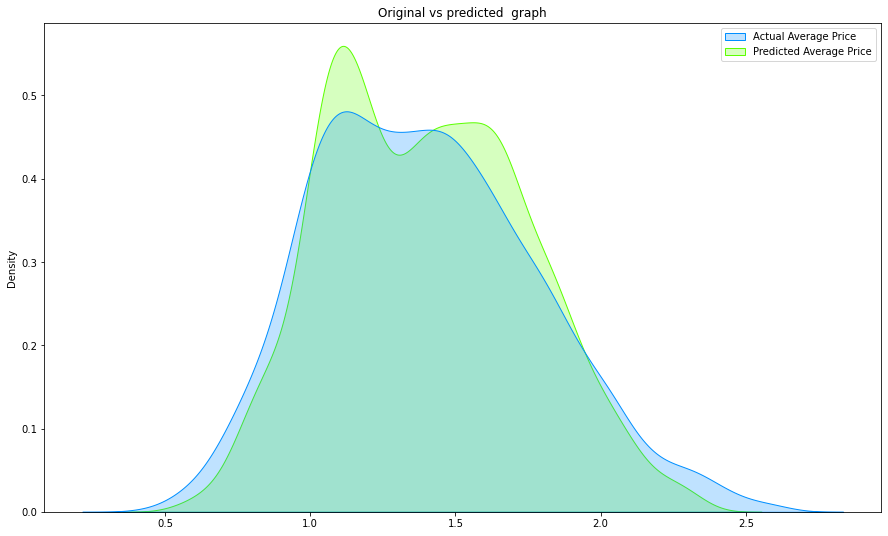

In [80]:
plt.figure(figsize=(15,9))
sns.kdeplot(data=conclusion, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

# SATISFIED RESULT

# NOW CONSIDERING PREDICTION AS TARGET VARIABLE WE HAVE TO PREDICT THE RESULT.WE HAVE TO FOLLOW CLASSIFICATION MODEL UNDER THIS.

In [81]:
df3 = pd.read_csv('avocado.csv')
df3.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [82]:
df3['Date'] = pd.to_datetime(df3['Date'])     
df3['Day'] = df3['Date'].apply(lambda d:d.day)
df3['Month'] = df3['Date'].apply(lambda m:m.month)
df3.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


In [83]:
df3.drop(['Unnamed: 0','Date'], axis = 1, inplace = True)

In [84]:
lab_enc = LabelEncoder()
df4 = lab_enc.fit_transform(df3['type'])
pd.Series(df4)

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Length: 18249, dtype: int32

In [85]:
df3['type']=df4
df3.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,WestTexNewMexico,7,1


In [86]:
lab_enc = LabelEncoder()
data = lab_enc.fit_transform(df3['region'])
pd.Series(data)

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Length: 18249, dtype: int32

In [87]:
df3['region']=data
df3.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53,7,1


In [88]:
x = df3.drop(columns=['region'],axis=1)
y = df3['region']

In [89]:
x.shape

(18249, 13)

In [90]:
y.shape

(18249,)

In [91]:
x.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
Day              0.014310
Month            0.106617
dtype: float64

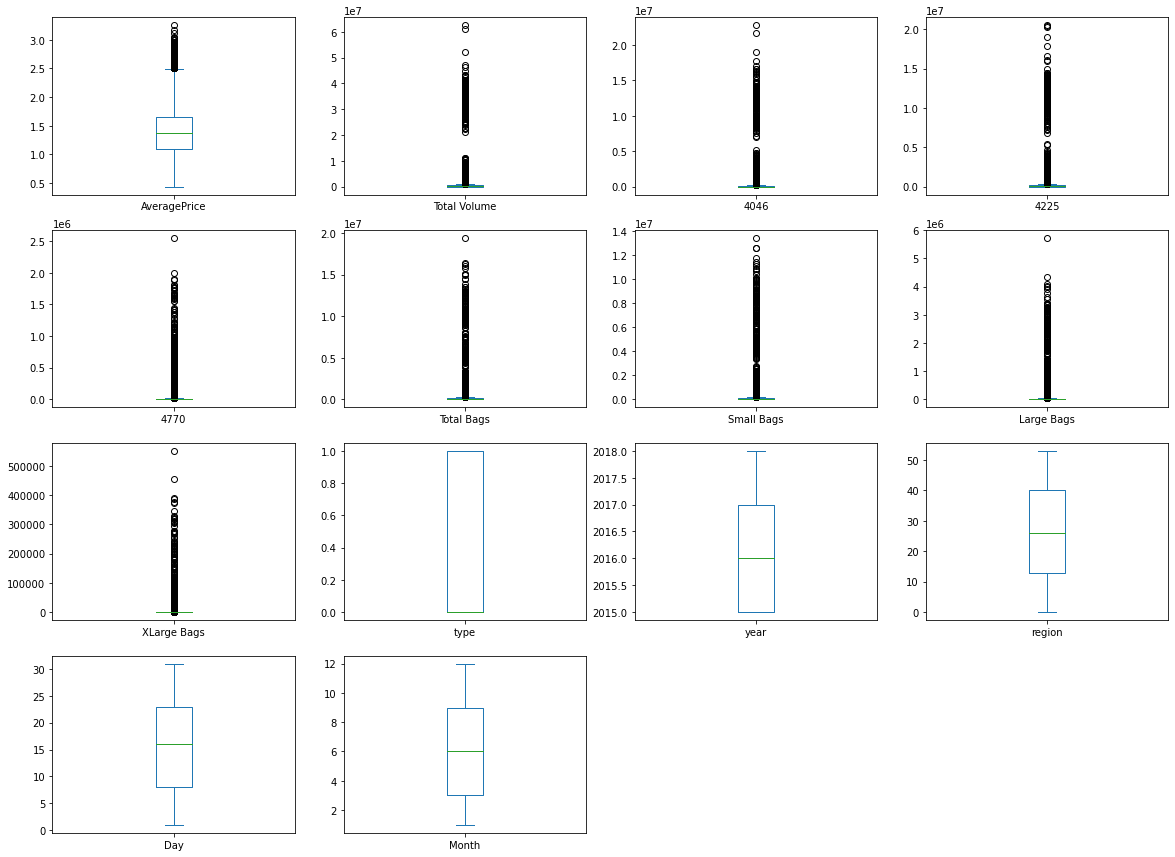

In [92]:
df3.plot(kind = 'box', subplots = True, layout = (4,4), figsize = (20,15))
plt.show()

In [93]:
z = np.abs(zscore(df3))
new_df3 = df3[(z<3).all(axis=1)]
new_df3.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53,7,1


In [94]:
new_df3.shape

(17651, 14)

In [95]:
df3.shape

(18249, 14)

In [96]:
# Let's check the the data loss
data_loss = (18249-17651)/18249*100
print('The  Data_loss from Zscore  is :',data_loss)
print("This is acceptable  range ")

The  Data_loss from Zscore  is : 3.276891884486821
This is acceptable  range 


In [97]:
new_df3.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Day             0.011778
Month           0.107408
dtype: float64

# almost all skewness is removed or is in acceptable level but we try more to reduce it

In [98]:
x = new_df3.drop(columns = 'region')
y = new_df3['region']

In [99]:
x.shape

(17651, 13)

In [100]:
y.shape

(17651,)

In [101]:
#Importing Standrd Scaler
from sklearn.preprocessing import StandardScaler
#scaling the data
scaler = StandardScaler()
sc = scaler.fit_transform(x)

In [102]:
#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(sc,i) for i in range(sc.shape[1])]

vif['features'] = x.columns


In [104]:
vif

,vif,features
0,1.794534e+00,AveragePrice
1,4.128047e+08,Total Volume
2,7.777217e+07,4046
3,6.410960e+07,4225
4,4.787466e+05,4770
5,1.924615e+13,Total Bags
6,1.275807e+13,Small Bags
7,1.290985e+12,Large Bags
8,6.647370e+09,XLarge Bags
9,1.844426e+00,type


In [105]:
#Transforming data
Transform = power_transform(x)

In [106]:
Transformed = pd.DataFrame(Transform)
Transformed.columns = x.columns

In [107]:
Transformed.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Day,Month
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047,-1.210647,1.227565,1.491383
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047,-1.210647,0.538229,1.491383
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047,-1.210647,-0.218959,1.491383
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047,-1.210647,-1.094426,1.491383
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047,-1.210647,1.415364,1.276081


In [108]:
Transformed.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.227731
Day            -0.208926
Month          -0.146554
dtype: float64

# ALL SKEWNESS REMOVED PERFECTLY

# MODEL BUILDING

In [109]:
x_scaled =  scaler.fit_transform(Transformed)

In [110]:
#Importing Evaluation metrics for Classification models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report

In [111]:
#Find best Random_state

maxaccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,random_state = i,test_size = 0.2)
    LR =  LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.5641461342395921 on Random State = 18


In [112]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size = 0.2, random_state = 18)

In [113]:
#Import Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
lr_model = LogisticRegression()
rd_model = RidgeClassifier()
dt_model = DecisionTreeClassifier()
sv_model = SVC()
knr_model = KNeighborsClassifier()
rfr_model = RandomForestClassifier()
xgb_model = XGBClassifier()
sgh_model = SGDClassifier()
Bag_model = BaggingClassifier()
ada_model = AdaBoostClassifier()
gbdt_model = GradientBoostingClassifier()

model = [lr_model,rd_model,dt_model,sv_model,knr_model,rfr_model,xgb_model,sgh_model,Bag_model,ada_model,gbdt_model]

In [115]:
for mod in model:
    mod.fit(x_train,y_train)
    mod.score(x_train,y_train)
    pred = mod.predict(x_test)
    print('Accuracy_Score of ',mod, 'is', accuracy_score(y_test,pred) * 100)
    print('Confusion Matrix of ',mod,' is \n', confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('=' * 70)

Accuracy_Score of  LogisticRegression() is 56.41461342395922
Confusion Matrix of  LogisticRegression()  is 
 [[46  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 54 ...  0  0  4]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  2  0 ...  0  0 11]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        66
           1       0.31      0.35      0.33        77
           2       0.83      0.72      0.77        75
           3       0.64      0.42      0.51        59
           4       0.51      0.57      0.54        58
           5       0.60      0.49      0.54        67
           6       0.83      0.89      0.86        61
           7       0.67      0.69      0.68        72
           8       0.62      0.78      0.69        46
           9       0.64      0.83      0.72        77
          10       0.51      0.45      0.48        62
          11       0.56      0.71      0.63        72
          12       0.62      0.4

Accuracy_Score of  SVC() is 80.96856414613424
Confusion Matrix of  SVC()  is 
 [[62  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  1]
 [ 0  0 72 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 0  0  0 ...  0  0 46]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        66
           1       0.64      0.58      0.61        77
           2       0.97      0.96      0.97        75
           3       0.73      0.76      0.74        59
           4       0.95      0.90      0.92        58
           5       0.92      0.72      0.81        67
           6       0.97      0.97      0.97        61
           7       0.81      0.75      0.78        72
           8       0.96      0.96      0.96        46
           9       0.79      0.79      0.79        77
          10       0.56      0.47      0.51        62
          11       0.88      0.92      0.90        72
          12       0.90      0.95      0.92        76
        

Accuracy_Score of  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...) is 89.49306145567829
Confusion Matrix of  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_

Accuracy_Score of  BaggingClassifier() is 87.22741433021807
Confusion Matrix of  BaggingClassifier()  is 
 [[58  0  0 ...  0  0  0]
 [ 0 62  0 ...  0  0  1]
 [ 0  0 71 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 42  0]
 [ 0  1  0 ...  0  0 50]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        66
           1       0.83      0.81      0.82        77
           2       0.99      0.95      0.97        75
           3       0.83      0.83      0.83        59
           4       0.93      0.98      0.96        58
           5       0.85      0.79      0.82        67
           6       0.94      0.97      0.95        61
           7       0.88      0.93      0.91        72
           8       0.96      0.96      0.96        46
           9       0.87      0.84      0.86        77
          10       0.83      0.84      0.83        62
          11       0.89      0.99      0.93        72
          12       0.92      0.89 

# ACCURACY SCORE OF RANDOM FOREST IS MAXIMUM OF 92% SO WE WILL HYPERTUNE THIS ONE TO ACHEIVE MORE ACCURACY

# HYPERTUNING RANDOM FOREST MODEL BY GRIDSEARCHCV

In [116]:
#Let's tune the parameters using GridSearchCV
params = {'n_estimators':[13,15,16],'criterion':['gini','entropy'],'max_depth':[10,12,15],'min_samples_leaf':[4,5,6],
          'min_samples_split':[10,11]}
          
GSV = GridSearchCV(rfr_model, param_grid = params)    
GSV.fit(x_train,y_train)   
print('best_params', GSV.best_params_)        

best_params {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 11, 'n_estimators': 16}


In [118]:
rfr_model = GSV.best_estimator_
rfr_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=11, n_estimators=16)

In [119]:
#Model Confidence/Accuracy

def metric_score(rfr_model,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = rfr_model.predict(x_train)
        print('\n===================================Train Result=================================')
        print(f"Accurancy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
    elif train == False:
        pred = rfr_model.predict(x_test)
        
        print('\n====================================Test Result================================')
        print(f"Accurancy Score: {accuracy_score(y_test,pred) *100:.2f}%")
        
        print('\n\n Test Classification Report \n', classification_report(y_test,pred,digits = 2))

In [120]:
#Call the function and pass dataset to check train and test score.
metric_score(rfr_model,x_train,x_test,y_train,y_test,train = True)
metric_score(rfr_model,x_train,x_test,y_train,y_test,train = False)


===================================Train Result=================================
Accurancy Score: 96.06%

====================================Test Result================================
Accurancy Score: 88.13%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88        66
           1       0.84      0.81      0.82        77
           2       0.96      0.95      0.95        75
           3       0.88      0.83      0.85        59
           4       0.98      1.00      0.99        58
           5       0.86      0.76      0.81        67
           6       0.97      0.95      0.96        61
           7       0.89      0.89      0.89        72
           8       0.98      0.89      0.93        46
           9       0.88      0.84      0.86        77
          10       0.81      0.76      0.78        62
          11       0.89      0.99      0.93        72
          12       0.89      0.93      0.91        76


# succesfully tuned the model.

In [121]:
#Saving the best model to the local file system
best_model = 'final_model.pickle'
pickle.dump(rfr_model, open('rfr_model', 'wb'))

In [124]:
#Loading saved model
loaded_model = pickle.load(open('rfr_model','rb'))

In [133]:
conclusion = loaded_model.predict(x_test)
conclusion

array([47, 30,  5, ..., 23,  5, 42])

In [134]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
conclusion = pd.DataFrame({'Actual': y_test, 'Predicted': conclusion})
conclusion.head()

,Actual,Predicted
9842,13,47
13494,30,30
307,5,5
15283,10,10
16748,37,37


Text(0.5, 1.0, 'Original vs predicted  graph')

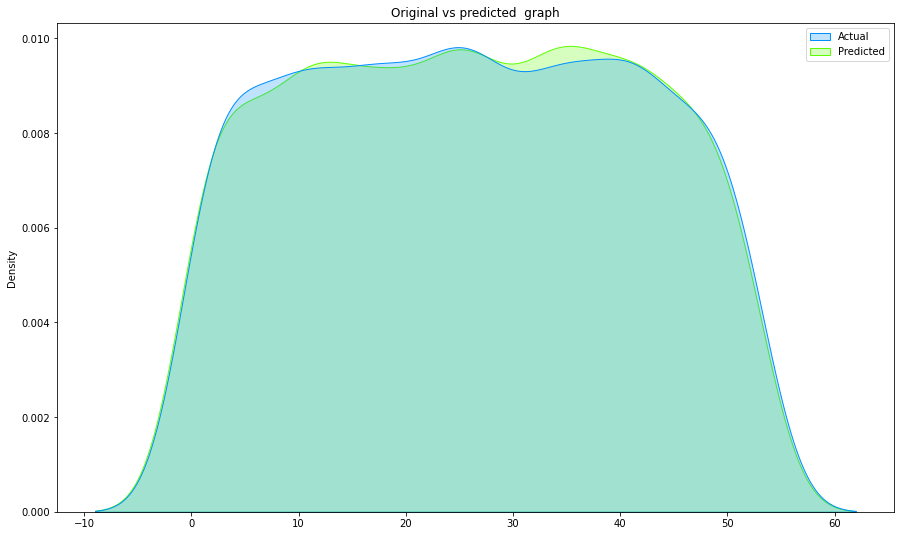

In [135]:
plt.figure(figsize=(15,9))
sns.kdeplot(data=conclusion, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

# perfect actual vs prediction curve